<a href="https://colab.research.google.com/github/JoDeMiro/Micado-Research/blob/main/ML_Auto_X23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Auto X23.ipynb

## Gyors link
[log](#log) [car](#car) [run](#run) [zip](#zip)

Lényeges változás az ML Auto 21-hez képest,

> - teljesen át lettek írva a plot függvények (volt egy bug a `plot.show()` és a `plot.savefig()` sorrendjével kapcsolatban)
- az ani-gif helyett mp4-be exportálok
- számítási függvényekben változás nem keletkezett

Furhter modifications:

> - kisebb idegösszeomlást kaptam amikor az egész rendszert áttettem egy újjabb numpy scikikt learn verzióra és kiderült ugyan olyan beállítások mellett más eredményt ad `->` az eltérés oka sok féle lehet, de ttől függetlenül rávilágított egy komoly problémára `->` ha az autó kilép a sávból akkor két szenzor értékei nullára állnak `->` ezt a jelnséget mindeféleképen orvosolni kell. <br> <br> Ennek kapcsán csináltam egy kisérletet amiben a középső center értékeit gyakorlatilag konstansra állítottam - ezáltál szinte zéró szerepet kap a számításokban és így is végig tudott menni a pályán, igaz nem olyan szépen.
- még néhány `print()` függvényt át kell irnom `-> printer.decision()`, annak érdekében, hogy az output még kissebb legyen.
- `DataExport()`-ot be kell vezetnem. <br> <br> Ez egy átfogó és nagy munka lesz, de elengedhetetlen a későbbi munkákhoz. <br> <br> Valószínűleg a következő X23-ban fogom elkezdeni fejleszteni de az X24-ben lesz releaselve. (Valószínűleg sok új változót fog generálni és a strukturát is értinteni fogja)
- A tanulás során megtanulst súlyokat rögzítse és legyen perzistens az `mlp` és a `linearRegression`. Ez komoly modsítást és sok átalakítást igényel.
- A sávban található összes pontrja meg kell mérnem az állapotteret és ezeken az adatokon feltanítani a nurális hálót, majd ennek alapján végig engednem a neurális háló tanítása nélkül a pályán `->` az ehhez a kísérlethet tartozó függvényt kell megírnom `<-` de ennek előfeltétele, hogy legyen képes a neurális háló perzistens adatokból dolgozni.

Further plots():

> A plottolás elég fontos eleme a rendszernek. Ezeken keresztül nyerünk betekintést abba, hogy mi is történik a felsznín alatt **nem csak debuggolásra alkalmas de összehasonlításokra is**.
<br> <br>
- szeretnék egy olyan plotot ami az `left.sensor`, `right.sensor`, `y.distance` kapcsolatot mutatja be `->` méghozzá úgy, hogy rajta van az `mlp` által becsült érték is. Ez utóbbi lehet pontfelhő, de lehet surface is.
- szeretnék olyan plotokat, amelyeken:
-- a lineráis regresszió befora `->` after becsléseinek koefficiensei szerepelnek idősorrendben, szenzoronként.
- szeretnék egy olyan plotot ahol a `left.sensor`, 'right.sensor` `y.distance` 3Dimenzióban van ábrázolva és az épen aktuális pont értékét egy hajszákereszt mutatja.

Furhter experiments:

> lassan készen állok minden plot és segédfüggvényel, ezért ipari módon lehet megfuttatni néhány kísérletet.
- Sensorok témakörben elég sok lehetőségem van:
-- elöször is a középső szenzor kiiktatása különösen érdekel, hogy reagál erre a rendszer változatlan beállítások mellett
-- számos lehetőségem van arra is, hogy a rendszer stabilitását vizsgáljam például azzal, hogy milyen messzire látnak a szenzorok.
- Az út eddig három periodikus függvényből állt össze, úgyhogy idővel muszáj neki megtanulnia asz összefüggéseket. `->` Érdekelne, hogy mi van akkor ha:
-- diskrét ugrásokat teszek bele
-- bonyolultabb függvényt kap
-- szélesebb lesz az út
-- változik az út szélessége
Ezekre mind új függvényeket kell írnom és át kell írni a `Road` osztályt úgy, hogy ezek a beállítások mind szépen paraméterezhetőek legyenek, miközben meg tudom örizni `default` beállításnak az eredeti beállítást.

Lényeges változás az ML Auto 21-hez képest,

> hogy minden output ki-be kapcsolható lett.

Válaszható lett.

> Itt annyit változtattam, hogy 'Action' után is visszaengedem a before after adatokat. Ennyivel bővülnek a before after adatok. Igy nem csak a mesterséges mozgatás által jut adatokhoz.

Bevezetésre került:

> Kivettem a before after linreg becslésből az Interceptet

Bevezetésre került:

> Linreg helyett MLP van a main modelben

Bevezetésre került:

> Az action kiszámolásánál az új érték is -1, 1 közé lesz normalizálva

Bevezetésre került:

> Minimum 7, Maximum 7 lépést tehet mindkét irányba

Bevezetésre került:

> pyplot save_plots függvény, ami kexportálja png-be a plottokat

Változtatásra került:

> Incremental - Online learnig. A neurális hálóban a warm_start beállítása és az iter = 1

Ki lett kapcsolva:

> a save_plot és save_plots ezért a futás sokkal gyorsabb

Változtatásra került:

> Az átviteli függvény 'logistic' helyet 'tanh' lett

Bevezetésre került:

> Új könyvjelzők, főként online learning és gradient descent témakörben

Változtatásra került:

> Az action végrehajtása átkerült a tanuló ágról ( i % 3 == 0 ) a teszt ágra ( i % 3 == 1 )

Változtatásra került (ver. 21):

> loggerek (nn, lr, append) bevezetésre került

Változtatásra került (ver. 21):

> külön objektumba került az MLPRegressor


# Későbbi kísérletek

> - MLP activation function {relu, tanh, logistic} <br> mindegyikkel vigyázni kell mert más más normalizációt igényelnek `->` bár már korábban megállapítottam, hogy a [-1, +1] transzformáció a legjobb minden esetben. <br> <br> Az már pár próba alapján látszik, - és tudni is lehetett - hogy vannak különbségek. A `logistic` elég jól teljesített, de még megy a `->` szisztematikus tesztelésbe.
- Legyen meg az, hogy egy feltanított háló hogyan teljesít a pályán az elejétől a végéig, úgy hogy már nem tanul többet.
- Legyen a teljes állapot téren feltanított neurális háló alapján végrehajtott futás is elvégezve és ez erdemények kiértékelve, majd összevetve a korábbi eredményekkel.
- Átteni a döntéshozás a predicted fázisba( i % 3 == 1 )


# Jegyzet

Ne felejtsük el, hogy a before after linregnek nem kell normalizálnia az adatokat.
Az viszont már fontos, hogy amikor a linreg before-after adatok alapján becslést
készítünk arra, hogy mi lesz a fel-le eredménye a neurális hálóba engedve
akkor ott normalizálnunk kell a bemenetet. <br> <br> Minden ilyen lépés magában hordozza a potenciális hiba lehetőségét. Nem mindegy, hogy a `minmax_scaler` az új adatokat egy korábban normalizált adatsoron vagy az új értékeken végzi el. Erre mindíg oda kell fegyelni [ToDo: Végig ellenőrizni az összeset]

# ToDo

**Gondolat:**

Nyilvánvaló, hogy egy idő után se a before after adatokra nem képes jó becslést adni
```
proba_X_metrika   =  [[1 1]]
-------- 1 y up ->  left   =  [[2.13709439]]
-------- 1 y up ->  center =  [[1.94404015]]
-------- 1 y up ->  right  =  [[1.85292015]]
```
Ezért arra gondoltam, hogy beeresztem azokat az adatokat is, amelyeket az action körben lép meg. <br>
Ha úgy se megy akkor át kell gondolni a képletet! A becslés képleétt, before after.

**ToDo:**

Csinálni kell egy ábrát, hogy mi a kapcsolat a tényleges before after között és nem csinálni rá semmilyen becslét. Egyszerűen minden metrikára megnézni, hogy mi a lépés elötti adata és mi a lépés utáni adata. Ezt meg lehet csinálni úgy, hogy egy ploton vízszintesen van before, fűggőlegesen az after, és színnel van kódolva az action (kék +1, piros -1) **Done** Ez lett a `plot_before_after_sensor_values` függvény.

Ennek az lenne az értelme, hogy lássuk a egyáltalán megragadható-e valamilyen lináris kapcsolat a before - after adatok között - vagy ez egyáltalán elvárható-e a lineáris regressziótól


1. A fenti viszgálatot azért végzem el, hogy lássam, hol kap olyan adatokat **milyen helyzetben kap olyan adatokat** a before after adatsor amitől ilyen mértékben elromlik az előre jelző képessége.

2. Teljesen nyilvánvaló, hogy a szenzoros adatok és a tengelytől mért távolság közötti kapcsolatot a lineáris regresszió képtelen megragadni.

3. Utána ki kell próbálni, hogy a szenzorok nem előre néznek, hanem oldalra. Igen ez teljes egészében az amit a célváltozó is mér. De csak ellenőrzés végett.

4. A fenti kísérlet sorozatot elvégeztem. **Mindegyik állítás validálva**


**ToDo:**

A before - after linregnél elgondolkoztam azon, hogy egy egy szélső eset nagyon el tudja húzni a becslést ezért lehet, hogy Huber költségfüggvényt kéne használnom a négyzetes hiba helyett - A hivatkozások között is jeleztem. Az `SGDRegressor` pedig alapból tudja.

Fenti állítás időközben megoldódott - mási miatt ment el a linreg becslése. Azóta ezt a hibát már korrigáltam. Ha mégis meg akarom nyugtatni magam akkor van egy külön plot függvényem arra ami az `after_predicted` `->` `after_true` becslés kapcsolatát mutatja be.


<a name="tartalom"></a>
## Tartalom

Bevezetés

> [Bevezető](#bevezeto)<br>
> [Play Ground](#play_ground)<br>
> [Semmi-Supervised learning](#szintetikus_adatok)<br>
> [Korábbi hibák](#korabbi_hibak)<br>
> [Irodalom](#irodalom)<br>
> [ToDo](#todo)<br>

<a name="tartalom"></a>
## Bevezető gondolat

Összességében az egésszel kapcsolatban van egy hatalmas kérdőjel.

Tulajdonképpen két paradigma van.

Az egyik - nem az enyém - így néz ki:

Egyszerűen becsüjük meg azt, hogy az adott szenzoros adatok alapján mi legyen a döntés kimenetele (fel, le, semmi). Akkor hoztunk jó döntést, ha valamilyen metrika alapján valamilyen költséget minimalizáltunk, vagy maximalizáltunk. Például, ha egy döntéssel sikerült közelebb kerülni a záróvonalhoz, vagyis az út közepére. Vagy az az autó a lehető legmeszebb jutott el anélkül, hogy érintette volna a falat és lehetőleg a legrövidebb úton is.

A másik - amin én dolgozom - viszont egy plusz lépéssel egészül ki és ettől sokkal bonyolultabb. Hogy van-e létjogosultsága az ennek a *kísérletsorozatnak* a lényege, amelyben ez a program egy segédeszköz.

&nbsp;&nbsp;&nbsp;Vannak szenzoros adataink, ami alapján hozunk egy döntést. Eddig olyan mint a máisik, de az érdemi különbség a módszerben és a tanulás folyamatában van.

A szenzoros adatokból megbecsüljük azt, hogy mennyire vagyunk jók és nem azt becsüljük, hogy mit kéne tenni!

Ha nem vagyunk jók akkor egy második modell segítségével csinálunk valamilyen lépést, amitől azt várjuk, hogy jók leszünk.

És itt jogosan merül fel a kérdés, hogy de miért nem az első módszert alkalmazzuk és erre most még én sem tudom a választ pontosan megadni. De röviden erről szól ez a kutatás.

## Paradmigva váltás

Miért olyan nehéz debuggolni ezt a rendszert?

Azért mert ha belegondolsz felügyelt tanulásnál mutatsz egy mintát, a rendszer kiszámolja a hibát és a hiba szerint módosítja a tanulásnál a súlyokat.

Itt viszont mutatsz egy mintát a rendszer kiszámoja a hibát a hiba szerint módosítja a súlyokat, a súlyok alapján hoz egy döntést, AMIT VISSZACSATOLÓDIK A RENDSZERBE olyan formán, hogy ezzel a lépéésel megváltoznak a bemeneti adatok, ami alapján újra tanítjuk a rendszert, és így tovább ahogy haladunk előre az időben, a tanulás során.

```
Attól lesz reinforcement learning, hogy a döntést visszatápláljuk a rendszerbe,
ezáltal megváltoznak a bemeneti adatok. Ez a legnagyobb különbség a supervised
és a re-enforcement learning között.
```

## Vegyünk észre azonban egy érdekes dolgot

Az által, hogy a neurális hálóvan azt becsüljük, hogy milyen messze van a középvonaltól, tulajdonképpen eljárhatnánk úgy is, a neurális háló becslése alapján hozzuk meg döntés `->` hiszen tulajdonképpen ezzel tudnánk a legközelebb visszatérni a középvonalhoz.

 

# Korábbi hibák

Bevezetésre került a regresszió kilistázása minden lehetséges action értékre.<br>
Ez egy új ellenőrzési pont.
```
		 j =  -2
		 ------------------------ a regresszió bemenetei az éppen aktuális értékek -------------------
		 _X_left   =  [[54 -2]]
		 _X_center =  [[ 4 -2]]
		 _X_right  =  [[ 2 -2]]
		 predicted_left   =  [[54.74525509]]
		 predicted_center =  [[2.54721423]]
		 predicted_right  =  [[0.88015566]]

		 predicted_position =  [[-24.53178614]]
```

Egy másik ellenőrzési pont

```
		 # Ennyivel mozdulna el egy szenzor adat 1 egység változással ha 1 lenne a before értéke
proba_X_metrika   =  [[1 1]]
-------- 1 y up ->  left   =  [[-3.50830476e-14]]
-------- 1 y up ->  center =  [[2.]]
-------- 1 y up ->  right  =  [[2.]]
```

Egy másik ellenőrzési pont

```
van már before after, mindenhol van tanulás és az eredmények is jók

az első alkalommal a -3 lépés kerül kiszámításra (jól néz ki)

minden j-re kiszámolom a regressziót és be is helyetessítjük a kapott értékekekt a modellba
		 j =  -3
		 ------------------------ a regresszió bemenetei az éppen aktuális értékek -------------------
		 _X_left   =  [[51 -3]]
		 _X_center =  [[110  -3]]
		 _X_right  =  [[51 -3]]
		 predicted_left   =  [[54.]]
		 predicted_center =  [[107.]]
		 predicted_right  =  [[48.]]
		 --------------------- a regression úgy tűnik, hogy jó és pontos ----------------------
		 regression_left.coef_   =  [[ 1. -1.]]
		 regression_center.coef_ =  [[1. 1.]]
		 regression_right.coef_  =  [[1. 1.]]
		 regression_left.intercept_   =  [-3.55271368e-14]
		 regression_center.intercept_ =  [1.42108547e-14]
		 regression_right.intercept_  =  [-3.55271368e-14]
		 # Ez lesz a bemenete a neurális hálónak
		 -------------------------X-------------------------
		  [[ 54. 107.  48.]]
		 --------------- Tökéletesen működik ---------------
		 --------------- Ha -3 egységgel lejjebb lépünk akkor a szenzoros adatok --------
		 --------------- úgy fognak megváltozni, hogy a belölük képzett neurális hálós becslés -------------
		 --------------- szerint pont -3 egységgel leszünk lejebb a középvonaltól --------
		 predicted_position =  [[-3.]]
```


# Korábbi PNG fájlok törlése

In [ ]:
! rm *.png
! rm *.gif
! rm *.zip
! rm *.mp4

rm: cannot remove '*.gif': No such file or directory


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
class Kutya():
  def __init__(self, blind):
    self._vau = True
    self._blind = blind
  
  def vau(self, name):
    print("Hello ", name, "vagyok")
    print("self._vau = ", self._vau)
    print("self._blind = ", self._blind)

  def bark(self):
    if(self._blind == True):
      print("Helo vaksi vagyok nagyon ugatok")
    if(self._blind == False):
      print("Hello nem vagyok vaksi ezért nem ugatok annyit")

In [ ]:
Loren = Kutya(True)

Loren.vau("Loren")

Loren.bark()

Mazsi = Kutya(False)

Mazsi.vau("Mazsi")

Mazsi.bark()


Hello  Loren vagyok
self._vau =  True
self._blind =  True
Helo vaksi vagyok nagyon ugatok
Hello  Mazsi vagyok
self._vau =  True
self._blind =  False
Hello nem vagyok vaksi ezért nem ugatok annyit


<a name="log"></a> log [car](#car) [run](#run) [zip](#zip)

In [ ]:
class Printer():
  def __init__(self):
    self._nn = True               # Neural Network
    self._lr = False              # Linear Regression on Before After
    self._sr = False              # Sensor Data
    self._ba = False              # Before After Data
    self._nf = False              # Print Info
    self._db = False              # Print Debug
    self._er = True               # Print Error
    self._ut = True               # Print Util
    self._bs = True               # Print Basic
    self._in = True               # Print Investigation
    self._ac = False              # Print Action results
    self._dc = True               # Print Decision result
    
    

  def nn(self, text, value = ""):
    if( self._nn == True ):
      print(text, value)

  def lr(self, text, value = ""):
    if( self._lr == True ):
      print(text, value)

  def sr(self, text, value = ""):
    if( self._sr == True ):
      print(text, value)
  
  def ba(self, text, value = ""):
    if( self._ba == True ):
      print(text, value)

  def info(self, text, value = ""):
    if( self._nf == True ):
      print(text, value)
  
  def debug(self, text, value = ""):
    if( self._db == True ):
      print(text, value)
  
  def error(self, text, value = ""):
    if( self._er == True ):
      print(text, value)

  def util(self, text, value = ""):
    if( self._ut == True ):
      print(text, value)

  def basic(self, text, value = ""):
    if( self._bs == True ):
      print(text, value)

  def investigation(self, text, value = ""):
    if( self._in == True ):
      print(text, value)

  def action(self, text, value = ""):
    if( self._ac == True ):
      print(text, value)

  def decision(self, text, value = ""):
    if( self._dc == True ):
      print(text, value)

  def nn_(self, text):
    if( self._nn == True ):
      print(text)

  def lr_(self, text):
    if( self._lr == True ):
      print(text)

  def sr_(self, text):
    if( self._sr == True ):
      print(text)

  def ba_(self, text):
    if( self._ba == True ):
      print(text)

  def info_(self, text):
    if( self._nf == True ):
      print(text)

  def debug_(self, text):
    if( self._db == True ):
      print(text)
  
  def error_(self, text):
    if( self._er == True ):
      print(text)

  def util_(self, text):
    if( self._ut == True ):
      print(text)
  
  def basic_(self, text):
    if( self._bs == True ):
      print(text)
  
  def investigation_(self, text):
    if( self._in == True ):
      print(text)

  def action_(self, text):
    if( self._ac == True ):
      print(text)

  def decision_(self, text):
    if( self._dc == True ):
      print(text)

In [ ]:
f = Printer()

print('> Debug')
print('> nn = {}'.format(f._nn))
print('> lr = {}'.format(f._lr))
print('> sr = {}'.format(f._sr))
print('> ba = {}'.format(f._ba))
print('> info = {}'.format(f._nf))
print('> debug = {}'.format(f._db))
print('> error = {}'.format(f._er))
print('> util = {}'.format(f._ut))
print('> investigation = {}'.format(f._in))
print('> action = {}'.format(f._ac))
print('> decision = {}'.format(f._dc))


f.info_('> valami = {}'.format(20))
f.info('> valami = ', 25)
f.debug('> valami = ', 30)
f.debug('> valami')
f.util('> util is enabled')
f.util('> util value = ', 20)
f.util('> util value = {}'.format(21))
f.investigation('> investigation value = ', 'investigation')
f.ba('> ba value = ', 'befoe after')
f.action('> action value = ', 'action value something')
f.action('> action value = {}'.format(20))
f.decision('> decision value = ', 'decision value something')
f.decision('> decision value = {}'.format(20))


f.info('> valami = {}'.format(200000))

> Debug
> nn = True
> lr = False
> sr = False
> ba = False
> info = False
> debug = False
> error = True
> util = True
> investigation = True
> action = False
> decision = True
> util is enabled 
> util value =  20
> util value = 21 
> investigation value =  investigation
> decision value =  decision value something
> decision value = 20 


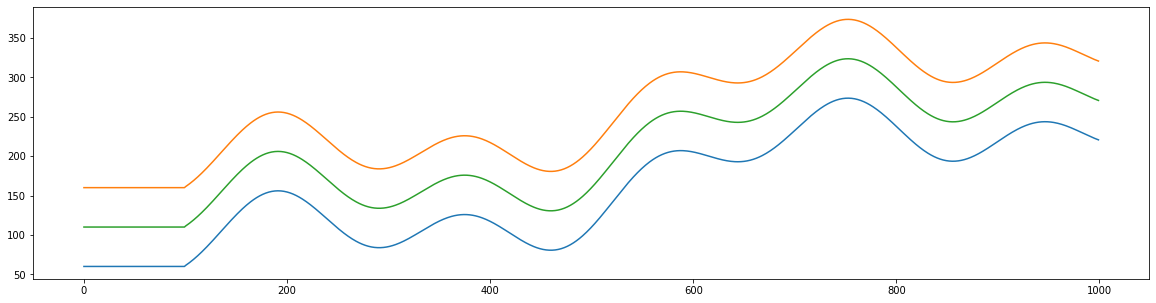

In [ ]:
distance    = np.arange(0, 1000, 1)
road        = 100
wall_left   = 30*(np.sin(distance/180)) + distance * 0.3 + 30 * np.cos(distance/30) + 50 * np.sin(distance/90)
wall_left[0:100] = 60
wall_right  = wall_left + road
wall_center = ( wall_left + wall_right ) / 2


plt.figure(figsize=(20,5)); plt.plot(wall_left); plt.plot(wall_right); plt.plot(wall_center); plt.show()

In [ ]:
class Road():
  def __init__(self, wide):
    self.length      = 3000
    self.distance    = np.arange(0, self.length, 1)
    self.wide        = wide
    self.wall_right  = 30*(np.sin(self.distance/180)) + self.distance * 0.3 + 30 * np.cos(self.distance/30) + 50 * np.sin(self.distance/90)
    self.wall_right[0:100] = 60
    self.wall_left   = self.wall_right + self.wide
    self.wall_center = ( self.wall_left + self.wall_right ) / 2

    self.description()

  def show(self):
    fig, ax = plt.subplots(figsize=(26,10)); ax.set_ylim(40, 1000); ax.plot(self.wall_left); ax.plot(self.wall_right); ax.plot(self.wall_center);
    return fig, ax
  
  def description(self):
    print('# ----------------------------------------- road Description -----------------------------------------')
    print('  \t\t road.length = ', self.length)
    print('  \t\t minimum slope (descending) = ', np.min(np.diff(self.wall_center, 1, -1, prepend=self.wall_center[0])))
    print('  \t\t maximum slope (ascending)  =  ', np.max(np.diff(self.wall_center, 1, -1, prepend=self.wall_center[0])))
    print('# ----------------------------------------------------------------------------------------------------')


<a name="car"></a> [log](#log) car [run](#run) [zip](#zip)

In [ ]:
class Car():
  def __init__(self, road):
    self.plot_frequency = 100
    self.plot_detailed_frequency = 32
    self.plot_investigation_flag = 0                    # 0 - disable, 1 - plot, 2 - save, 3 - both
    self.plot_before_after_sensor_values_flag = 0       # 0 - disable, 1 - plot, 2 - save, 3 - both
    self.plot_before_after_sensor_estimation_flag = 0   # 0 - disable, 1 - plot, 2 - save, 3 - both
    self.plot_state_space_discover_flag = 0             # 0 - disable, 1 - plot, 2 - save, 3 - both
    self.plot_trace_flag = 0                            # 0 - disable, 1 - plot, 2 - save, 3 - both

    self.road = road
    self.x = 0
    self.y = self.road.wall_center[0]
    self.sight = 400           # ennyit lát előre 300, 54, 154
    self.sight_center = 400    # ennyit lát előre 150

    self.y_history  = []
    self.x_history  = []
    # self.y_center   = []
    self.y_center   = self.road.wall_center
    self.y_distance = []
    self.y_distance_real = []
    self.y_distance_predicted = []
    self.y_distance_predicted_inv = []
# Bevezetésre került a LinearRegression intercept nélkül
    self.regression = LinearRegression(fit_intercept=False)
# Bevezetésre került az MLPRegreression
    self.mlp = MLPRegressor(hidden_layer_sizes=(10, 5), # (10, 5)
                            activation='tanh', # relu, tanh, logistic
                            solver='adam',
                            batch_size='auto',
                            learning_rate_init=0.01,
                            max_iter=1,                           # incremental learning - one step
                            shuffle=False,                        # erre is oda kell figyelni
                            random_state=1,
                            verbose=True, warm_start=True,        # New test warm_start and verbose 9:19 alatt 719-ig, 600 5:34
                            momentum=0.9,
                            nesterovs_momentum=True,
                            early_stopping=True,
                            n_iter_no_change=2000)
# Bevezetésre került az X MinMaxScaler
    self.x_minmaxscaler = MinMaxScaler(feature_range=(-1,1))
# Bevezetésre került az y MinMaxScaler
    self.y_minmaxscaler = MinMaxScaler(feature_range=(-1,1))
#
#    self.regression_left = LinearRegression()
    self.regression_left = LinearRegression(fit_intercept=False)
#    self.regression_center = LinearRegression()
    self.regression_center = LinearRegression(fit_intercept=False)
#    self.regression_right = LinearRegression()
    self.regression_right = LinearRegression(fit_intercept=False)

# data holders
    self.sensor_center = []
    self.sensor_left   = []
    self.sensor_right  = []
    self.before  = []
    self.after   = []

    self.mesterseges_coutner = 0

# logger helyett
    global printer
    printer = Printer()


  def calculate_distances(self):
    # ha bármikor kevesebb a faltól mért távolsága bármelyik szenzoron akkor a szenzorokon mért távolság is ennyi lesz
    
    k = self.x; d = 0
    while(k < self.x + self.sight_center):
      k += 1; d += 1
      self.distance_center_from_wall = d
      if(int(self.road.wall_left[k]) < self.y):
        printer.sr('Sensor center = ', self.distance_center_from_wall)
        break
      if(int(self.road.wall_right[k]) > self.y):
        printer.sr('Sensor center = ', self.distance_center_from_wall)
        break

    k = self.x; d = 0
    while(k < self.x + self.sight):
      k += 1;  d += 1
      self.distance_left_from_wall = d
      if(int(self.road.wall_left[k]) < self.y + d):
        printer.sr('Sensor from left wall = ', self.distance_left_from_wall)
        break

    k = self.x; d = 0
    while(k < self.x + self.sight):
      k += 1; d += 1
      self.distance_right_from_wall = d
      if(int(self.road.wall_right[k]) > self.y - d):
        printer.sr('Sensor from right wall = ', self.distance_right_from_wall)
        break

    # ki kell kalkulálni a tényleges távolságot a ball és a jobb faltól
    # mert ezekre fogom tanítani a neurális hálót, ahol ezeket becsüljük
    # és a bemeneti változó a 3 szenzorból érkező adat lesz.
    # valójában azt mérjük, hogy milyen távolságra van az út közepétől

    self.distance_from_top     = abs(self.road.wall_left[self.x] - self.y)
    self.distance_from_bottom  = abs(self.road.wall_right[self.x] - self.y)
    printer.sr('most távolsagra van a felső faltól = ', self.distance_from_top)
    printer.sr('most távolsagra van az alsó faltól = ', self.distance_from_bottom)


    printer.info('cccccccccccccccccccccccccccccccccccccccccccccccccccccccccccc')
    printer.info('self.x                       = ', self.x)
    printer.info('cccccccccccccccccccccccccccccccccccccccccccccccccccccccccccc')

    # ezt az értéket fogom becsülni, a középértéktől való eltérés mértéke, ha pozitív akkor fölfelé, ha negatív akkor lefelé tér el
    self.vertical_distance_from_middle = self.y - self.road.wall_center[self.x]

    printer.info('KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK')
    printer.info('self.vertical_distance_from_middle = ', self.vertical_distance_from_middle)
    printer.info('KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK')




    printer.info('ezt fogjuk becsülni, ez a középértéktől való eltérés mértéke = ', self.vertical_distance_from_middle)


    # de elötte szeretnék még valamit leellenőrizni
    # ezeknek a hossza nem fog megeggyezni a tényleges futások számával, hanem több lesz
    # (milyen jó lett volna erre egy teszt esetet írni és akkor test driven development lenne)

    printer.debug('\t\t\t ---------------- Teszt ----------------')
    printer.debug('\t\t\t len(self.y_distance)    = ', len(self.y_distance))
    printer.debug('\t\t\t len(self.sensor_left)   = ', len(self.sensor_left))
    printer.debug('\t\t\t len(self.sensor_center) = ', len(self.sensor_center))
    printer.debug('\t\t\t len(self.sensor_right)  = ', len(self.sensor_right))
    printer.debug('\t\t\t self.x                  = ', self.x)
    printer.debug('\t\t\t -------------- Teszt End --------------')


  def append(self):
    self.y_distance.append(self.vertical_distance_from_middle)

    self.sensor_left.append(self.distance_left_from_wall)
    self.sensor_center.append(self.distance_center_from_wall)
    self.sensor_right.append(self.distance_right_from_wall)

    printer.debug('\t\t\t ---------------- Append ----------------')
    printer.debug('\t\t\t len(self.y_distance)    = ', len(self.y_distance))
    printer.debug('\t\t\t len(self.sensor_left)   = ', len(self.sensor_left))
    printer.debug('\t\t\t len(self.sensor_center) = ', len(self.sensor_center))
    printer.debug('\t\t\t len(self.sensor_right)  = ', len(self.sensor_right))
    printer.debug('\t\t\t self.x                  = ', self.x)
    printer.debug('\t\t\t -------------- Append End --------------')


  def plot(self):
    fig, ax = self.road.show()
    circle = plt.Circle((self.x, self.y), 5, color='black')
    ax.add_patch(circle)
    ax.plot(range(int(self.x), int(self.x+self.distance_center_from_wall)), np.repeat(self.y, self.distance_center_from_wall))
    ax.plot(range(int(self.x), int(self.x+self.distance_left_from_wall)), range(int(self.y), int(self.y+self.distance_left_from_wall)))
    ax.plot(range(int(self.x), int(self.x+self.distance_right_from_wall)), range(int(self.y), int(self.y-self.distance_right_from_wall), -1))
    if( len(self.y_history) > 0 ):
      ax.plot(self.y_history)
    plt.show()


# Bevezetésre került, elmenti a képet
  def save_plot(self):
    fig, ax = self.road.show()
    circle = plt.Circle((self.x, self.y), 5, color='black')
    ax.add_patch(circle)
    ax.plot(range(int(self.x), int(self.x+self.distance_center_from_wall)), np.repeat(self.y, self.distance_center_from_wall))
    ax.plot(range(int(self.x), int(self.x+self.distance_left_from_wall)), range(int(self.y), int(self.y+self.distance_left_from_wall)))
    ax.plot(range(int(self.x), int(self.x+self.distance_right_from_wall)), range(int(self.y), int(self.y-self.distance_right_from_wall), -1))
    if( len(self.y_history) > 0 ):
      ax.plot(self.y_history)
      ax.set_title('#i = ' + str(self.x), fontsize=18, fontweight='bold')
    plt.savefig('history{0:04}'.format(self.x)+'.png')
    plt.close()

    print(' --- plot has been saved --- ')
    # Nem jeleníti meg a képet csak elmenti


# Bevezetésre került, elementi a képet
  def save_plots(self):
# y_distance vs y_distance_predicted
    plt.figure(figsize=(12, 5)); plt.scatter(self.y_distance_real, self.y_distance_predicted)
    plt.ylabel('y_distance_predicted'); plt.xlabel('y_distance_real');
    plt.title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
    plt.savefig('y_distance_vs_y_distance_predicted_{0:04}'.format(self.x)+'.png')
    plt.close()


# y_distance vs y_distance_predicted összes adaton
    X_test_full = np.array([self.sensor_left, self.sensor_center, self.sensor_right]).T
    _X_test_full = X_test_full
#    predicted_test_full = self.regression.predict(_X_test_full)
  # Lineáris regresszió helyett Neurális hálót használok
    _X_test_full_scaled = self.x_minmaxscaler.transform(_X_test_full)
    predicted_test_full = self.mlp.predict(_X_test_full_scaled)
  # ToDo : itt még lehet, hogy kéne transzformálni y-t is és az egészet visszatranszformálni eredeti értékére + ellenőrizni, hogy tulajdonképpen amikor skálázom az y-t akkor mi alapján skálázok
    predicted_test_full = self.y_minmaxscaler.inverse_transform(predicted_test_full.reshape(-1, 1))
    _y_test_full = np.array([self.y_distance]).T
    print(_y_test_full.shape)
    print(predicted_test_full.shape)
    plt.figure(figsize=(12, 5)); plt.scatter(_y_test_full, predicted_test_full, c='r');
    plt.ylabel('y_distance_predicted'); plt.xlabel('y_distance_real');
    plt.title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
    plt.savefig('y_distance_vs_y_distance_predicted_all_{0:04}'.format(self.x)+'.png')
    plt.close()


# y_distance vs y_distance_predicted összes adaton színezve
    _array_target = np.array([_y_test_full.ravel(), predicted_test_full.ravel(), np.arange(0, _y_test_full.shape[0], 1)]).T

    plt.figure(figsize=(12, 5)); plt.scatter(_array_target[:,0], _array_target[:,1], c=_array_target[:,2]);
    plt.ylabel('y_distance_predicted'); plt.xlabel('y_distance_real');
    plt.title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
    plt.savefig('y_distance_vs_y_distance_predicted_all_color_{0:04}'.format(self.x)+'.png')
    plt.close()


# y_distance vs y_distance_predicted összes adaton színezve vezető vonallal
    plt.figure(figsize=(12, 5)); ax = plt.axes(); ax.scatter(_array_target[:,0], _array_target[:,1], c=_array_target[:,2])
    ax.plot([-10, 2, 4, 10], [-10, 2, 4, 10]); ax.set_ylabel('y_distance_predicted'); ax.set_xlabel('y_distance_real');
    ax.set_title('#i = ' + str(self.x), fontsize=18, fontweight='bold')
    plt.savefig('y_distance_vs_y_distance_predicted_all_color_line_{0:04}'.format(self.x)+'.png')
    plt.close()


# Milyen kapcsolat van a bemenő adatok és a célváltozó között
    plt.figure(figsize=(12, 5)); plt.scatter(self.sensor_left, self.y_distance, c=_array_target[:,2]);
    plt.ylabel('self.y_distance'); plt.xlabel('self.sensor_left');
    plt.title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
    plt.savefig('sensor_left_vs_y_distance_{0:04}'.format(self.x)+'.png')
    plt.close()


# y_distance vs y_distance_predicted összes adaton színezve vezető vonallal
    plt.figure(figsize=(12, 5)); ax = plt.axes(); ax.scatter(_array_target[:,0], _array_target[:,1], c=_array_target[:,2])
    ax.plot([-10, 2, 4, 10], [-10, 2, 4, 10]); ax.set_ylabel('y_distance_predicted'); ax.set_xlabel('y_distance_real');
    ax.set_ylim((-30, 30)); ax.set_xlim((-50, 50));
    ax.set_title('#i = ' + str(self.x), fontsize=18, fontweight='bold')
    plt.savefig('y_distance_vs_y_distance_predicted_all_color_line_fix_{0:04}'.format(self.x)+'.png')
    plt.close()

    print(' --- plots have been saved --- ')


  def plot_investigation(self, _y_test_full, predicted_test_full, flag):

    if( flag != 0 ):

#      plt.figure(figsize=(12, 5)); plt.scatter(self.y_distance_real, self.y_distance_predicted);
#      plt.ylabel('y_distance_predicted'); plt.xlabel('y_distance_real'); plt.title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
#      plt.savefig('yDistance_vs_yDistance_predicted_typeAAAA_{0:04}'.format(self.x)+'.png');
#      plt.show();
#      plt.close();

#      fig = plt.figure(figsize=(12, 5)); plt.scatter(self.y_distance_real, self.y_distance_predicted);
#      plt.ylabel('y_distance_predicted'); plt.xlabel('y_distance_real'); plt.title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
#      # white_patch = mpatches.Patch(color='white', label='number of observation = ' + str(len(self.y_distance_real))); plt.legend(handles=[white_patch])
#      if( flag == 1 or flag == 3 ): plt.show();
#      if( flag == 2 or flag == 3 ): fig.savefig('yDistance_vs_yDistance_predicted_typeCCCC_{0:04}'.format(self.x)+'.png'); plt.close(fig);

      # Milyen kapcsolat van a középponttól vett távolság és ugyan ennek a változónak a neurális hálóval becsült értéke között (csak a tanítás után)
      fig = plt.figure(figsize=(12, 5)); plt.scatter(self.y_distance_real, self.y_distance_predicted);
      plt.ylabel('y_distance_predicted'); plt.xlabel('y_distance_real'); plt.title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
      white_patch = mpatches.Patch(color='white', label='number of observation = ' + str(len(self.y_distance_real))); plt.legend(handles=[white_patch])
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig('yDistance_vs_yDistance_predicted_type0_{0:04}'.format(self.x)+'.png'); plt.close(fig)

      # mmmmmmmmmmmmmmmm
      # ez itt kulcsfontosságú lesz.
      # az alap problémám az volt vele, hogy a függőleges tengelyen lévő adatok nem mormalizáltak
      # a vizsszíintes tengelyen viszont a neurális háló utáni becsült értékek normalizált formában jelennek meg
      # ezért amelett, hogy első körben meghagyom a fenti plotot kell csinálnom egy olyat amin a neurális háló által becsült értékek
      # vissza vannak transzformálva

      # 1)
      #
      # Ebben az a csalóka, hogy becsült értékeket eltároljuk
      # itt viszont egy olyan visszatranszformációt hajtok végre rajtuk
      # amiközben már változott a <<self.y_minmaxscaler>>
      # tehát a visszatranszformáció igazából nem lesz helyes
      #
      # ahol y vissza van transformálva eredeti formájára
      print('type(self.y_distance_predicted) = ', type(self.y_distance_predicted))
      inv_y_distance_predicted = self.y_minmaxscaler.inverse_transform(self.y_distance_predicted)
      # Milyen kapcsolat van a középponttól vett távolság és ugyan ennek a változónak a neurális hálóval becsült értéke között (csak a tanítás után)
      fig = plt.figure(figsize=(12, 5)); plt.scatter(self.y_distance_real, inv_y_distance_predicted);
      plt.ylabel('y_distance_predicted_inv (wrong)'); plt.xlabel('y_distance_real'); plt.title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
      white_patch = mpatches.Patch(color='white', label='number of observation = ' + str(len(self.y_distance_real))); plt.legend(handles=[white_patch])
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig('yDistance_vs_yDistance_predicted_typeWrong_{0:04}'.format(self.x)+'.png'); plt.close(fig)

      # 2)
      #
      # Elvileg ez a helyes - de a fentit meghagyom hogy lássam a különbséget
      # ahol a <<y_distance_predicted>> változó előáll ott csinálok rajta gyorsan egy visszatranszformációt és azt is eltárolom egy listában
      # majd pedig azt jelenítem itt meg (sokkal tisztább, nehogy már egy plot fügvényben legyen adat transzformáció)
      #
      # így ugyanis akkor áll elő a visszatranszformáció amikor még ugyan azokat az adatokat kapta meg a <<self.y_minmaxscaler>>
      #
      # Milyen kapcsolat van a középponttól vett távolság és ugyan ennek a változónak a neurális hálóval becsült értéke között (csak a tanítás után)
      fig = plt.figure(figsize=(12, 5)); plt.scatter(self.y_distance_real, self.y_distance_predicted_inv);
      plt.ylabel('y_distance_predicted_inv (correct)'); plt.xlabel('y_distance_real'); plt.title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
      white_patch = mpatches.Patch(color='white', label='number of observation = ' + str(len(self.y_distance_real))); plt.legend(handles=[white_patch])
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig('yDistance_vs_yDistance_predicted_typeCorrect_bw_{0:04}'.format(self.x)+'.png'); plt.close(fig)

      # X) ugyan ez csak az idő színnel kiegészítve
      _time = np.array([np.arange(0, len(self.y_distance_predicted_inv), 1)]).T
      fig = plt.figure(figsize=(12, 5)); plt.scatter(self.y_distance_real, self.y_distance_predicted_inv, c=_time);
      plt.ylabel('y_distance_predicted_inv (correct)'); plt.xlabel('y_distance_real'); plt.title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
      white_patch = mpatches.Patch(color='white', label='number of observation = ' + str(len(self.y_distance_real))); plt.legend(handles=[white_patch])
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig('yDistance_vs_yDistance_predicted_typeCorrect_col_{0:04}'.format(self.x)+'.png'); plt.close(fig)


      # Milyen kapcsolat van a középponttól vett távolság és ugyan ennek a változónak a neurális hálóval becsült értéke között
      fig = plt.figure(figsize=(12, 5)); plt.scatter(_y_test_full, predicted_test_full, c='r');
      plt.ylabel('y_distance_predicted'); plt.xlabel('y_distance_real'); plt.title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
      # plt.ylabel(r'$\int\ Y^2\ dt\ \ [V^2 s]$')
      white_patch = mpatches.Patch(color='white', label='number of observation = ' + str(len(_y_test_full))); plt.legend(handles=[white_patch])
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig('yDistance_vs_yDistance_predicted_type1_{0:04}'.format(self.x)+'.png'); plt.close(fig)

      _array_target = np.array([_y_test_full.ravel(), predicted_test_full.ravel(), np.arange(0, _y_test_full.shape[0], 1)]).T

      # Milyen kapcsolat van a középponttól vett távolság és ugyan ennek a változónak a neurális hálóval becsült értéke között
      fig = plt.figure(figsize=(12, 5)); plt.scatter(_array_target[:,0], _array_target[:,1], c=_array_target[:,2]);
      plt.ylabel('y_distance_predicted'); plt.xlabel('y_distance_real'); plt.title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
      white_patch = mpatches.Patch(color='white', label='number of observation = ' + str(len(_array_target[:,0]))); plt.legend(handles=[white_patch])
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig('yDistance_vs_yDistance_predicted_type2_{0:04}'.format(self.x)+'.png'); plt.close(fig)

      # Milyen kapcsolat van a középponttól vett távolság és ugyan ennek a változónak a neurális hálóval becsült értéke között
      fig = plt.figure(figsize=(12, 5)); ax = plt.axes(); ax.scatter(_array_target[:,0], _array_target[:,1], c=_array_target[:,2])
      ax.plot([-10, 2, 4, 10], [-10, 2, 4, 10]); ax.set_ylabel('y_distance_predicted'); ax.set_xlabel('y_distance_real');
      ax.set_title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
      white_patch = mpatches.Patch(color='white', label='number of observation = ' + str(len(_array_target[:,0]))); plt.legend(handles=[white_patch])
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig('yDistance_vs_yDistance_predicted_type3_{0:04}'.format(self.x)+'.png'); plt.close(fig)

      # Milyen kapcsolat van a középponttól vett távolság és ugyan ennek a változónak a neurális hálóval becsült értéke között
      fig = plt.figure(figsize=(12, 5)); ax = plt.axes(); ax.scatter(_array_target[:,0], _array_target[:,1], c=_array_target[:,2])
      ax.plot([-10, 2, 4, 10], [-10, 2, 4, 10]); ax.set_ylabel('y_distance_predicted'); ax.set_xlabel('y_distance_real');
      ax.set_ylim((-30, 30)); ax.set_xlim((-50, 50)); ax.set_title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
      white_patch = mpatches.Patch(color='white', label='number of observation = ' + str(len(_array_target[:,0]))); plt.legend(handles=[white_patch])
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig('yDistance_vs_yDistance_predicted_type4_{0:04}'.format(self.x)+'.png'); plt.close(fig)

      # Milyen kapcsolat van a középponttól vett távolság és ugyan ennek a változónak a neurális hálóval becsült értéke között
      fig = plt.figure(figsize=(12, 5)); ax = plt.axes(); ax.scatter(_array_target[:,0], _array_target[:,1], c=_array_target[:,2])
      ax.plot([-20, 2, 4, 20], [-20, 2, 4, 20]); ax.set_ylabel('y_distance_predicted'); ax.set_xlabel('y_distance_real');
      ax.set_ylim((-60, 60)); ax.set_xlim((-60, 60)); ax.set_title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
      white_patch = mpatches.Patch(color='white', label='number of observation = ' + str(len(_array_target[:,0]))); plt.legend(handles=[white_patch])
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig('yDistance_vs_yDistance_predicted_type5_{0:04}'.format(self.x)+'.png'); plt.close(fig)


  def plot_investigation_senors(self, _y_test_full, predicted_test_full, flag):

    if( flag != 0 ):

      _array_target = np.array([_y_test_full.ravel(), predicted_test_full.ravel(), np.arange(0, _y_test_full.shape[0], 1)]).T

      # Milyen kapcsolat van a bal oldali szenzor <<bemenő adat>> és a célváltozó között
      fig = plt.figure(figsize=(12, 5)); plt.scatter(self.sensor_left, self.y_distance, c=_array_target[:,2]);
      plt.ylabel('self.y_distance'); plt.xlabel('self.sensor_left'); plt.title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
      white_patch = mpatches.Patch(color='white', label='number of observation = ' + str(len(self.sensor_left))); plt.legend(handles=[white_patch])
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig('sensorLeft_vs_yDistance_v1_{0:04}'.format(self.x)+'.png'); plt.close(fig)

      printer.info('len(self.sensor_left) = ', len(self.sensor_left))
      printer.info('len(self.y_distance) = ', len(self.y_distance))

      # Milyen kapcsolat van a közéső szenzor <<bemenő adat>> és a célváltozó között
      fig = plt.figure(figsize=(12, 5)); plt.scatter(self.sensor_center, self.y_distance, c=_array_target[:,2]);
      plt.ylabel('self.y_distance'); plt.xlabel('self.sensor_center'); plt.title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
      white_patch = mpatches.Patch(color='white', label='number of observation = ' + str(len(self.sensor_center))); plt.legend(handles=[white_patch])
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig('sensorCenter_vs_yDistance_v1_{0:04}'.format(self.x)+'.png'); plt.close(fig)

      # Milyen kapcsolat van a jobb oldali szenzor <<bemenő adat>> és a célváltozó között
      fig = plt.figure(figsize=(12, 5)); plt.scatter(self.sensor_right, self.y_distance, c=_array_target[:,2]);
      plt.ylabel('self.y_distance'); plt.xlabel('self.sensor_right'); plt.title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
      white_patch = mpatches.Patch(color='white', label='number of observation = ' + str(len(self.sensor_right))); plt.legend(handles=[white_patch])
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig('sensorRight_vs_yDistance_v1_{0:04}'.format(self.x)+'.png'); plt.close(fig)



  def plot_before_after_sensor_estimation(self, _y_left, _predicted_left, y_delta, flag):

    if( flag != 0 ):

      # mennyire jó a left szenzor before after becslése
      fig = plt.figure(figsize=(6, 6));
      plt.scatter(_y_left, _predicted_left); plt.ylabel('_predicted_left'); plt.xlabel('_true_y_left');
      plt.scatter(_y_left[-1], _predicted_left[-1], c='black', s=12);
      # plt.title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
      plt.title('#i = ' + str(self.x));
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig('sensorLeftAfterScaled_vs_sensorLeftPredictedAfterScaled_v0_{0:04}'.format(self.x)+'.png'); plt.close(fig)

      # color -> y_delta
      fig = plt.figure(figsize=(6, 7.5))
      plt.scatter(_y_left, _predicted_left, c=y_delta); plt.ylabel('_predicted_left'); plt.xlabel('_true_y_left');
      plt.title('#i = ' + str(self.x));
      cmap = mpl.cm.viridis
      # bounds = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
      bounds = np.arange(y_delta.min(), y_delta.max(), 1)
      if( bounds.size < 3 ): bounds = [-1, 0, 1]
      # print('bounds = ', bounds)
      norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
      plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             orientation='horizontal',
             label='Elmozdítás mértéke');
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig('sensorLeftAfterScaled_vs_sensorLeftPredictedAfterScaled_v1_{0:04}'.format(self.x)+'.png'); plt.close(fig)

      # size  -> y_delta legyen már rajta valami méretjelző ábra
      fig = plt.figure(figsize=(6, 6))
      plt.scatter(_y_left, _predicted_left, s=(3*y_delta)+10); plt.ylabel('_predicted_left'); plt.xlabel('_true_y_left');
      plt.title('#i = ' + str(self.x));
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig('sensorLeftAfterScaled_vs_sensorLeftPredictedAfterScaled_v2_{0:04}'.format(self.x)+'.png'); plt.close(fig)

      # nem biztos, hogy kell mellé az idő is, de elvileg az még hiányzik
      _array_target = np.array([_y_left.ravel(), _predicted_left.ravel(), y_delta.ravel(), np.arange(0, y_delta.shape[0], 1)]).T

      # [[_array_target]] [_yleft, _predicted_left, y_delta, time]
      # color -> time
      fig = plt.figure(figsize=(7.5, 6))
      plt.scatter(_array_target[:,0], _array_target[:,1], c=_array_target[:,3]); plt.ylabel('_predicted_left'); plt.xlabel('_true_y_left');
      plt.title('#i = ' + str(self.x));
      plt.colorbar(orientation='vertical', label='Time');
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig('sensorLeftAfterScaled_vs_sensorLeftPredictedAfterScaled_v3_{0:04}'.format(self.x)+'.png'); plt.close(fig)

      # [[_array_target]] [_yleft, _predicted_left, y_delta, time]
      # color -> time, size = y_delta
      fig = plt.figure(figsize=(7.5, 6))
      plt.scatter(_array_target[:,0], _array_target[:,1], c=_array_target[:,3], s=_array_target[:,2]+10); plt.ylabel('_predicted_left'); plt.xlabel('_true_y_left');
      plt.title('#i = ' + str(self.x));
      plt.colorbar(orientation='vertical', label='Time');
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig('sensorLeftAfterScaled_vs_sensorLeftPredictedAfterScaled_v4_{0:04}'.format(self.x)+'.png'); plt.close(fig)

      # [[_array_target]] [_yleft, _predicted_left, y_delta, time]
      # color -> time, size = y_delta
      fig = plt.figure(figsize=(6, 7.5))
      plt.scatter(_array_target[:,0], _array_target[:,1], c=_array_target[:,3], s=_array_target[:,2]+10); plt.ylabel('_predicted_left'); plt.xlabel('_true_y_left');
      plt.title('#i = ' + str(self.x));
      plt.colorbar(orientation='horizontal', label='Time');
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig('sensorLeftAfterScaled_vs_sensorLeftPredictedAfterScaled_v5_{0:04}'.format(self.x)+'.png'); plt.close(fig)


  def plot_before_after_sensor_estimation_in_one_chart(self, _y_sensor, _predicted_sensor, y_delta, name, flag):

    if( flag != 0 ):

      fileName = 'sensor' + name.capitalize() + 'AfterScaled_vs_sensor' + name.capitalize() + 'PredictedAfterScaled_S1'

      fig = plt.figure(figsize=(18, 7.5));
      # plt.figure(figsize=(18, 7.5));
      
      # color -> y_delta
      plt.subplot(1, 3, 1)
      plt.scatter(_y_sensor, _predicted_sensor, c=y_delta); plt.ylabel('_predicted_' + name); plt.xlabel('_true_' + name);
      plt.title('#i = ' + str(self.x));
      cmap = mpl.cm.viridis
      # bounds = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
      bounds = np.arange(y_delta.min(), y_delta.max(), 1)
      if( bounds.size < 3 ): bounds = [-1, 0, 1]
      # print('bounds = ', bounds)
      norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
      plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             orientation='horizontal',
             label='Elmozdítás mértéke');

      # nem biztos, hogy kell mellé az idő is, de elvileg az még hiányzik
      _array_target = np.array([_y_sensor.ravel(), _predicted_sensor.ravel(), y_delta.ravel(), np.arange(0, y_delta.shape[0], 1)]).T

      # [[_array_target]] [_y_sensor, _predicted_sensor, y_delta, time] pl [_y_left, _predicted_left, y_delta, time]
      # color -> time
      plt.subplot(1, 3, 2)
      plt.scatter(_array_target[:,0], _array_target[:,1], c=_array_target[:,3]); plt.ylabel('_predicted_' + name); plt.xlabel('_true_' + name);
      plt.title('#i = ' + str(self.x));
      plt.colorbar(orientation='horizontal', label='Time');

      # [[_array_target]] [_y_sensor, _predicted_sensor, y_delta, time] pl [_y_left, _predicted_left, y_delta, time]
      # color -> time, size = y_delta
      plt.subplot(1, 3, 3)
      plt.scatter(_array_target[:,0], _array_target[:,1], c=_array_target[:,3], s=_array_target[:,2]+10); plt.ylabel('_predicted_' + name); plt.xlabel('_true_' + name);
      plt.title('#i = ' + str(self.x));
      plt.colorbar(orientation='horizontal', label='Time');
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig(fileName + '_{0:04}'.format(self.x)+'.png'); plt.close()


  def plot_before_after_sensor_values(self, _array_target, name, flag):

    if( flag != 0 ):

      fileName = 'sensor' + name.capitalize() + 'BeforeScaled_vs_sensor' + name.capitalize() + 'AfterScaled'

      # Mi a kapcsolat a before after sesoros adatok között [[ez nem a becslés, hanem a nyers adatok]]
      # _array_target = [[before_array[:,1](sensor), after_array[:,1](sensor), y_delta{action}, time]]
      print(' ---------- plot scatter plot for before after value with time {color} 2 ----------------')

      fig = plt.figure(figsize=(6.25, 5));
      plt.scatter(_array_target[:,0], _array_target[:,1], c=_array_target[:,3]);
      plt.ylabel('after'); plt.xlabel('before');
      plt.title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
      __x_max = _array_target[:,0].max();
      __x_min = _array_target[:,0].min();
      __y_max = _array_target[:,1].max();
      __y_min = _array_target[:,1].min();
      __x_cen = __x_max + ((__x_max - __x_min) * 0.1);
      __y_cen = (__y_max + __y_min)/2;
      plt.text(__x_cen, __y_cen, name, rotation='vertical', horizontalalignment='center', verticalalignment='center');
      white_patch = mpatches.Patch(color='white', label='number of observation = ' + str(len(_array_target[:,0]))); plt.legend(handles=[white_patch])
      plt.colorbar(orientation='vertical', label='time');
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig(fileName + '_v1_{0:04}'.format(self.x)+'.png'); plt.close(fig)

      # Mi a kapcsolat a before after sesoros adatok között [[ez nem a becslés, hanem a nyers adatok]]
      print(' ---------- plot scatter plot for before after value with time {color} and action {size} 2 ----------------')
      fig = plt.figure(figsize=(6.25, 5));
      size = _array_target[:,2]
      size = np.abs(size) * 4 + 3
      plt.scatter(_array_target[:,0], _array_target[:,1], c=_array_target[:,3], s=size);
      plt.ylabel('after'); plt.xlabel('before');
      plt.title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
      plt.text(__x_cen, __y_cen, name, rotation='vertical', horizontalalignment='center', verticalalignment='center');
      white_patch = mpatches.Patch(color='white', label='number of observation = ' + str(len(_array_target[:,0]))); plt.legend(handles=[white_patch])
      plt.colorbar(orientation='vertical', label='time');
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig(fileName + '_v2_{0:04}'.format(self.x)+'.png'); plt.close(fig)

      # Mi a kapcsolat a before after sesoros adatok között [[ez nem a becslés, hanem a nyers adatok]]
      print(' ---------- plot scatter plot for before after value with time and action {color} 2 ----------------')
      fig = plt.figure(figsize=(6.25, 5));
      plt.scatter(_array_target[:,0], _array_target[:,1], c=_array_target[:,2]);
      plt.ylabel('after'); plt.xlabel('before');
      plt.title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
      plt.text(__x_cen, __y_cen, name, rotation='vertical', horizontalalignment='center', verticalalignment='center');
      white_patch = mpatches.Patch(color='white', label='number of observation = ' + str(len(_array_target[:,0]))); plt.legend(handles=[white_patch])
      cmap = mpl.cm.viridis
      bounds = np.arange(_array_target[:,2].min(), _array_target[:,2].max() + 1, 1)
      if( bounds.size < 3 ): bounds = [-1, 0, 1]
      # bounds = [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]
      # print('bounds = ', bounds)
      norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
      plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             orientation='vertical',
             label='Elmozdítás mértéke');
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig(fileName + '_v3_{0:04}'.format(self.x)+'.png'); plt.close(fig)


  def plot_state_space_discover(self, flag):

    # Az adatok nem a before afterből kellenek nekünk, hanem
    # self.y_distance
    # self.sensor_left
    # self.sensor_center
    # self.sensor_right

    # time -> create

    if( flag != 0 ):

      fileName = 'state_space_discover'

      szin = np.arange(len(self.sensor_right))

      fig = plt.figure(figsize=(10,10))
      ax = fig.add_subplot(projection='3d')
      ax.scatter(self.sensor_left, self.sensor_right, self.sensor_center, c=szin)
      ax.set_xlabel('sensor left')
      ax.set_ylabel('sensor right')
      ax.set_zlabel('sensor center')
      ax.invert_xaxis()
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig(fileName + '_LeftRightCenter_3D_{0:04}'.format(self.x)+'.png'); plt.close()

      fig = plt.figure(figsize=(10,10))
      ax = fig.add_subplot(projection='3d')
      ax.scatter(self.sensor_left, self.sensor_right, self.y_distance, c=szin)
      ax.set_xlabel('sensor left')
      ax.set_ylabel('sensor right')
      ax.set_zlabel('y_distance')
      # ax.invert_xaxis()
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig(fileName + '_LeftRightYDistance_3D_{0:04}'.format(self.x)+'.png'); plt.close()

# aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
      fig = plt.figure(figsize=(10,10))
      ax = fig.add_subplot(projection='3d')
      ax.scatter(self.sensor_left, self.sensor_right, self.y_distance, c=szin)
      ax.set_xlabel('sensor left')
      ax.set_ylabel('sensor right')
      ax.set_zlabel('y_distance')
      # ax.invert_xaxis()
      __x = self.sensor_left[-1]; __y = self.sensor_right[-1]
      __x_max = np.max(self.sensor_left)
      __y_max = np.max(self.sensor_right)
      ax.plot([0,10],[10,10], c='blue')
      ax.plot([10,10],[0,100], c='green')
      ax.plot([0,0],[0,__y_max],[-50,-50], c='orange')
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig(fileName + '_LeftRightYDistance_3D_{0:04}'.format(self.x)+'.png'); plt.close()

      fig = plt.figure(figsize=(10,10))
      ax = fig.add_subplot(projection='3d')
      plot = ax.scatter(self.sensor_left, self.sensor_right, self.y_distance, c=szin, cmap='winter')
      ax.set_xlabel('sensor left')
      ax.set_ylabel('sensor right')
      ax.set_zlabel('y_distance')
      ax.invert_xaxis()
      # Get rid of colored axes planes
      # First remove fill
      ax.xaxis.pane.fill = False
      ax.yaxis.pane.fill = False
      ax.zaxis.pane.fill = False
      # Now set color to white (or whatever is "invisible")
      ax.xaxis.pane.set_edgecolor('w')
      ax.yaxis.pane.set_edgecolor('w')
      ax.zaxis.pane.set_edgecolor('w')
      # Bonus: To get rid of the grid as well:
      ax.grid(False)
      # Colorbar:
      # Add colorbar
      cbar = fig.colorbar(plot, ax=ax, shrink=0.6)
      # cbar.set_ticks([0, 50, 100, 150, 200])
      # cbar.set_ticklabels(['0', '50', '100', '150', '200 nm'])
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig(fileName + '_LeftRightYDistance_WhitoutBorder_{0:04}'.format(self.x)+'.png'); plt.close()

      fig = plt.figure(figsize=(7.5, 6))
      plt.scatter(self.sensor_left, self.sensor_right, c=self.y_distance)
      plt.ylabel('sensor_right'); plt.xlabel('sensor_left');
      plt.colorbar(orientation='vertical', label='y_distance');
      plt.title('#i = ' + str(self.x))
      # plt.title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
      if( flag == 1 or flag == 3 ): plt.show()
      if( flag == 2 or flag == 3 ): fig.savefig(fileName + '_LeftRightYDistance_2D_{0:04}'.format(self.x)+'.png'); plt.close()


  def plot_trace(self, freq, flag):

    if( flag != 0 ):

      if( self.x % freq == 0 ):

        if( len(self.y_history) > 0 ):

          fileName = 'trace'
          fig, ax = self.road.show()
          circle = plt.Circle((self.x, self.y), 5, color='black')
          ax.add_patch(circle)
          ax.plot(range(int(self.x), int(self.x+self.distance_center_from_wall)), np.repeat(self.y, self.distance_center_from_wall))
          ax.plot(range(int(self.x), int(self.x+self.distance_left_from_wall)), range(int(self.y), int(self.y+self.distance_left_from_wall)))
          ax.plot(range(int(self.x), int(self.x+self.distance_right_from_wall)), range(int(self.y), int(self.y-self.distance_right_from_wall), -1))
          y_history_array = np.array(self.y_history)
          y_history_diff = np.diff(y_history_array, n=1, axis=-1, prepend=0)
          y_history_diff[0] = 0
          y_move = np.zeros(self.road.distance.shape[0])
          y_move[0:y_history_diff.shape[0]] = y_history_diff
          x = np.arange(self.road.distance.shape[0])
          ax.plot(self.road.wall_center[0] + y_move * 10)
          ax.plot(self.y_history)
          plt.title('#i = ' + str(self.x))
          # plt.title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
          if( flag == 1 or flag == 3 ): plt.show()
          if( flag == 2 or flag == 3 ): fig.savefig(fileName + '_{0:04}'.format(self.x)+'.png'); plt.close()

    if( flag != 0 ):

      if( self.x % freq == 0 ):

        if( len(self.y_history) > 0 ):

          fileName = 'y_move'
          fig = plt.figure(figsize=(10.5, 6))
          y_move = np.diff(np.array(self.y_history), 1, -1, prepend=0)
          y_move[0] = 0
          plt.plot(y_move)
          plt.hlines(0, 0, 100)
          plt.title('#i = ' + str(self.x))
          # plt.title('#i = ' + str(self.x), fontsize=18, fontweight='bold');
          if( flag == 1 or flag == 3 ): plt.show()
          if( flag == 2 or flag == 3 ): fig.savefig(fileName + '_{0:04}'.format(self.x)+'.png'); plt.close()










  def run(self, run_length):
    for i in range(0, run_length, 1):
      printer.util('# A run ciklus eleje --------------------------------------------------------------------------------------------------------------------')
      printer.util('# i = ', i)
      _summary_mlp_prediction_was_taken = 0
      _summary_mlp_fit_was_taken = 0
      _summary_mesterseges_mozgatas = 0
      _summary_action_was_taken = 0

# Beállítja az x értékét az éppen aktuális ciklusváltozó értékére
      self.x = i
# Kiszámoja a szenzoroknak a faltól mért távolságát
      self.calculate_distances()
# Eltárolja a kiszámolt értékeket
      self.append()

# Csak néha plottoljunk ne mindíg, egyébként a függvény is megkapja hogy mikor plottoljon
      if ( i % self.plot_frequency == 0 ):
        self.plot()
        print(' --------------- plot --------------- ')
        self.save_plot()
        print(' --------------- save plot --------------- ')
        # New
        self.plot_trace(self.plot_frequency, self.plot_trace_flag)
        print(' --------------- plot trace --------------- ')





# Itt kezdődik a lényeg
      if ( i >= 0 ):

        # --------------------------------------- A NEURÁLIS HÁLÓ TANÍTÁSA (1) ---------------------------------------
        
        if ( i % 3 == 0 and i >= 12 ):

          printer.info('------------------------------ IF i % 3 == 0 ------------------------------')
          printer.info('# i = ', i)
          printer.util('# i = ', i)
          printer.info('# 1. számú tanulás. Mi a kapcsolat a szenzoros adatok és aközött, hogy az út melyik részén van az autó (micadoban ez az NN)')
          X = np.array([self.sensor_left, self.sensor_center, self.sensor_right]).T
          y = np.array([self.y_distance]).T
          printer.debug('X.shape = ', X.shape)
          printer.debug('y.shape = ', y.shape)
          printer.debug('X       = ', X)
          printer.debug('y       = ', y)
          
          _summary_mlp_fit_was_taken = 1
# Lineáris regresszió helyett Neurális hálót használok
          self.x_minmaxscaler.fit(X)
          self.y_minmaxscaler.fit(y)
          X_scaled = self.x_minmaxscaler.transform(X)
          y_scaled = self.y_minmaxscaler.transform(y)
          printer.debug('---------------------')
          printer.debug('X.max = ', X.max())
          printer.debug('X.min = ', X.min())
          printer.debug('y.max = ', y.max())
          printer.debug('y.min = ', y.min())
          printer.debug('---------------------')
          printer.debug('X_scaled.shape = ', X_scaled.shape)
          printer.debug('y_scaled.shape = ', y_scaled.shape)
          printer.info('---------------------')
          printer.info('X_scaled.max = ', X_scaled.max())
          printer.info('X_scaled.min = ', X_scaled.min())
          printer.info('y_scaled.max = ', y_scaled.max())
          printer.info('y_scaled.min = ', y_scaled.min())
          printer.info('---------------------')
          self.mlp.fit(X_scaled, y_scaled)


        # --------------------------------------- A NEURÁLIS HÁLÓ MINŐSÉGÉNEK VISSZAMÉRÉSE, TESZTELÉSE (2) ---------------------------------------

        if( i % 3 == 1 and i >= 22 ):

          printer.info('------------------------------ IF i % 3 == 1 ------------------------------')
          printer.info('# i = ', i)
          printer.info('# 2. az 1. pontban megtanult modell alapján teszünk egy becslést - tulajdonképpen ezzel mérem az 1. modell jóságát, ez a lépés ezt szolgálja')
          X_test = np.array([self.sensor_left, self.sensor_center, self.sensor_right]).T
          _X_test = np.array([X_test[-1,:].reshape(-1,1)])
          _X_test = np.array([X_test[-1,:]])
          printer.info('actual _X_test = ', _X_test)

          _X_test_scaled = self.x_minmaxscaler.transform(_X_test)
          predicted_test = self.mlp.predict(_X_test_scaled)
# ToDo : Fontos lenne visszatranszformálni a predicted_test értéket mielőtt belekerül az archivumba
          _summary_mlp_prediction_was_taken = 1
          self.y_distance_real.append(self.y_distance[-1])
          self.y_distance_predicted.append(predicted_test)
# ToDo : Ellenőrizni, hogy közben nem változott-e a <<self.y_minmaxscaler>>
          predicted_test_inv = self.y_minmaxscaler.inverse_transform(predicted_test.reshape(-1, 1)).flatten()
          self.y_distance_predicted_inv.append(predicted_test_inv)

          printer.investigation('actual predicted_test = ', predicted_test)
          printer.investigation('actual self.y_distance[-1] = ', self.y_distance[-1])
          printer.investigation('actual predicted_test_inv = ', predicted_test_inv)
          printer.info('len(self.y_distance_real)      = ', len(self.y_distance_real))
          printer.investigation('len(self.y_distance_predicted) = ', len(self.y_distance_predicted))
          printer.investigation('len(self.y_distance_predicted_inv) = ', len(self.y_distance_predicted_inv))
          printer.debug('self.y_distance_real = \n', self.y_distance_real)
          printer.debug('self.y_distance_predicted = \n', self.y_distance_predicted)
          printer.debug('self.y_distance_perdicted_inv = \n', self.y_distance_predicted_inv)


# Plot : Minden 32-ik lépésbén kiplottoljuk a Neurális háló álltal előrejelzett és a tényleges adatok közötti kapcsolatot
# Ezzel a felétellel az a baj, hogy benne van egy másik if-ben ami azt mojda ki, hogyha i % 3 == 1
# Vagyi nem minden 32-ik lépésben plottolunk
          if( i % self.plot_detailed_frequency == 0 ):
            
            # korábban csak azokat az adatokat plottoltam amik a tanulás után lettek visszamérve, de nézzük meg a teljes adatsoron
            X_test_full = np.array([self.sensor_left, self.sensor_center, self.sensor_right]).T
            _X_test_full = X_test_full
            _X_test_full_scaled = self.x_minmaxscaler.transform(_X_test_full)
            predicted_test_full = self.mlp.predict(_X_test_full_scaled)
# ToDo : itt még lehet, hogy kéne transzformálni y-t is és az egészet visszatranszformálni eredeti értékére + ellenőrizni, hogy tulajdonképpen amikor skálázom az y-t akkor mi alapján skálázok
            predicted_test_full = self.y_minmaxscaler.inverse_transform(predicted_test_full.reshape(-1, 1))
            _y_test_full = np.array([self.y_distance]).T
            printer.info('_y_test_full.shape = ', _y_test_full.shape)
            printer.info('predicted_test_full.shape = ', predicted_test_full.shape)


# Plot
# (flag 0 = disable, flag 1 = plot, 2 = save, 3 = both)
            # Vizsgáljuk meg, hogy milyen kapcsolat van a becsült és a valós érték között
            self.plot_investigation(_y_test_full, predicted_test_full, self.plot_investigation_flag)

            # Illetve, hogy miyen kapcsolat van a szenzorok értékei és a becsült változó között (flag 0 = disable, flag 1 = plot, 2 = save, 3 = both)
            self.plot_investigation_senors(_y_test_full, predicted_test_full, self.plot_investigation_flag)



        # ----------------------------------------- MESTERSÉGES MOZGATÁS (3) -----------------------------------------

        # most jön az, hogy véletlenszerűen kell egyet ugrania fel, vagy le
        # ez felel meg a before after dologonak
        # az így létrejött adatokat is el kell tárolni úgy mint
        # mi volt a szezoros adat before
        # mi lett a szenzoros adat after
        # mi volt az y before, mi lett az y after
        # mivel mindíg egyet fogunk csak lépni, ezért a dif mindíg egy lesz
        # de ezt számítani kell, mivel a későbbiek folyamán lehet, hogy többet is fog lépni

        if( i % 3 == 2 ):

          printer.info('------------------------------ IF i % 3 == 2 ------------------------------')
          printer.info('# i = ', i)
          printer.info('# 3. véletlenszerűen változtatok az autó pozicióján -> ebből állnak elő a before after adatok')

          printer.info('self.y before move = ', self.y)

          _summary_mesterseges_mozgatas = 1
          
          if( self.mesterseges_coutner == 0 ):                             # Első lépésben fel
            self.before.append(np.array([self.y, self.distance_left_from_wall, self.distance_center_from_wall, self.distance_right_from_wall]))
            self.y = self.y + 1
            printer.info('artificial move -> up first')
            self.calculate_distances()
            self.after.append(np.array([self.y, self.distance_left_from_wall, self.distance_center_from_wall, self.distance_right_from_wall]))
            self.mesterseges_coutner = 1

          elif( self.mesterseges_coutner == 1 ):                           # Második lépésben le
            self.before.append(np.array([self.y, self.distance_left_from_wall, self.distance_center_from_wall, self.distance_right_from_wall]))
            self.y = self.y - 1
            printer.info('artificial move -> down first')
            self.calculate_distances()
            self.after.append(np.array([self.y, self.distance_left_from_wall, self.distance_center_from_wall, self.distance_right_from_wall]))
            self.mesterseges_coutner = 2

          elif( self.mesterseges_coutner == 2 ):                           # Harmadik lépésben le
            self.before.append(np.array([self.y, self.distance_left_from_wall, self.distance_center_from_wall, self.distance_right_from_wall]))
            self.y = self.y - 1
            printer.info('artificial move -> down second')
            self.calculate_distances()
            self.after.append(np.array([self.y, self.distance_left_from_wall, self.distance_center_from_wall, self.distance_right_from_wall]))
            self.mesterseges_coutner = 3

          elif( self.mesterseges_coutner == 3 ):                           # Negyedik lépésben fel
            self.before.append(np.array([self.y, self.distance_left_from_wall, self.distance_center_from_wall, self.distance_right_from_wall]))
            self.y = self.y + 1
            printer.info('artificial move -> up second')
            self.calculate_distances()
            self.after.append(np.array([self.y, self.distance_left_from_wall, self.distance_center_from_wall, self.distance_right_from_wall]))
            self.mesterseges_coutner = 0

          else:
            printer.info('semmi\n\n\n\n')

          printer.info('self.y after move = ', self.y)


        # ------------------------------------------------ ACTION (X) ------------------------------------------------

        # itt van egy érdekesség amit csak magamnak írok fel ezen a ponton lépünk ki a három if ágból - if( i % 3 == _ )
        # ez azért fontos, mert ami itt következik az mindíg lefut
        # akár volt neurális háló tanítás
        # akár volt neurális háló predikció visszamérése
        # akár volt mesterséges mozgatás

        # Felmerül a kérdés de csak felmerül, hogy nem lehet-e az, hogy ezt csak akkor kéne elvégezni amikor nincs neurális
        # háló tanítás és nincs mesterséges mozgatás sem. Ezt csak egy kísérlet ereéig ki kéne próbálni (if i % 3 == 1) ->
        # vagyis amikor az nn predikció mérése történik


        # version 20. -> if( i % 3 == 0 ); version 22. -> if( i % 3 == 1 )

        # atcion változó fogja tárolni, hogy mi lenne az optimizer szerint a helyes döntés -> fontos, hogy ezt a döntést meg is lépi
        action = 0
        if( i % 3 == 0 ):

          # ez az ág csak akkor fut le, ha már van elég before-after adatunk,
          # amíg nincs, addig nem csinál semmilyen kiértékelést, nem hoz döntést

          if( len(self.before) > 9 ):

            printer.info('------------------------------ IF len(self.before) > 9 ------------------------------')
            printer.info('\n')
            printer.info('  Ha már van elég before after adatunk')
            printer.info('# 3. Tanulás itt kerül kiszámításra a lineáris regresszió minden egyes metrikára')
            # minden egyes szezor adatára el kell készítenünk azt a lineráis regressziós modelt ami megmondja, hogy mi lenne a szenzor értéke, ha 1, 2, 3, ... n lépéssel elvinnénk a kocsit

            # oké megvan a before és megvan az after (self.y, left, center, right)
            # a before és az after array egyébként úgy épül fel, hogy a sorok a megfigyelések
            # 0-ik oszlop !!! Nem az ót közepétől vett eltérés mértéke, hanem az Y tengelyen mért távolság !!!
            # 1    oszlop sensor_left
            # 2    oszlop sensor_center
            # 3    oszlop sensor_right
            before_array = np.array(self.before)
            after_array  = np.array(self.after)
            y_delta = after_array[:,0] - before_array[:,0]
            delta_array = after_array - before_array
            printer.ba('\n----------------------- Before After Dataset Monitoring Block -----------------------')
            printer.ba('y_delta = ', y_delta)
            printer.ba('before_array.shape = ', before_array.shape)
            printer.ba('after_array.shape  = ', after_array.shape)
            printer.ba('self.before = \n', self.before)
            printer.ba('self.after  = \n', self.after)
            printer.ba('delta_array = \n', delta_array)
            printer.ba('-----------------------------------------------------------------------------\n')

            # képlet szerint sensor_after' = w0 + w1 * sensor_before + w2 * delta_y
            # a sensor_after és a sensor_befor érték világs
            # a delta_y azt fejezi ki, hogy mi volt az autó Y tengelyen mért távolságában megvigyelhető elétrés
            # << a skálázási logikában ez a fel le skálázás mértéke >>
            #
            # magyarul azt akarjuk megbecsülni <<sesor_after>> hogy hogyan állítható elő ez az értéke a sensor_before <<jelenlegi,
            # vagy elmozdítás elötti értékéből>> és az Y tengelyen vett elmozdulás mértékéből <<delta_y>>
            # [[Gondolom világos de azért leírom, hogy nem az autó Y tengelyen vett poziciójábaól]]
            # [[Hanem abból, hogy mekkora volt az elmozdulása az Y tengelyen]]

            printer.lr('# Linear Regression Learning --------------------------------------------------------------------------------------')
            printer.lr('\t\t # Linear Regression Training Results -------------------------------------------------------------------------')

  # -------------- left
            #> _X_left tehát a bemenet a left sensor before értéke és az y tengelyen vett elmozdulás mértéke
            #> _X_left = left és delta_y
            _X_left = np.array([before_array[:,1], delta_array[:,0]]).T
            #> _y_left a becsült érték pedig a left sesor elmozdulás után mért értéke
            _y_left = after = after_array[:,1].reshape(-1, 1)
            regression_left = self.regression_left
            regression_left.fit(_X_left, _y_left)
            # print('\t\t _X_left <<sensor before, y elmozdulás mértéke>>   = \n', _X_left)
            # print('\t\t _y_left <<sensor after az érték amit becsülnünk>> = \n', _y_left)
            printer.lr('\t\t ------------------------------- valyon mennyire jó a left   metrikának a becslése -----------------------------')
            printer.lr('\t\t regression_left.coef_ = ', regression_left.coef_)
            printer.lr('\t\t regression_left.intercept_ = ', regression_left.intercept_)
            #> _predicted_left lesz a bemenete a neurális hálónak
            #  nem a mostani formájában mert itt a tényleges le fel skálázási adatok alapján tanítottuk meg a lineáris regressziós modelt
            #  arra, hogy milyen összefüggés van a (1) skálázás elötti szenzoros adat értéke (2) az elmozdulás mértéke (3) és az így kapott
            #  új szenzoros érték között.
            #
            #  Miután előállt a modellünk <<regression_left>> ezzel fogjuk kiszámolni, hogy mi lenne a szenzor új értéke {+1, +2, +3, ..}
            #  elmozdítás esetén. -> Majd az így kapott értékeket pakoljuk be egyenként a neurális hálóba és számojuk ki, hogy mi lenne
            #  az így kapott Y tengelyen mért érték -> Majd pedig ennek alapján választjuk ki azt, amelyikkel a legközelebb tudunk
            #  jutni a kívánt célhoz

            _predicted_left = regression_left.predict(_X_left)

            #> Tehát a fenti <<_predicted_left>> változót csak azért hoztam létre, hogy vizsgálni tudjam, mennyire jól ragadta meg
            #  before<->after kapcsolatot leíró modell a kapcsolatot és mennyire jól képes becsülni az új értéket.
            #  [[tulajdonképpen ez itt egy dummy változó amit csak analízisre használok]]

            # mennyire jó a left szenzor before after becslése

            # Plot
            # (flag 1 = plot, 2 = save, 3 = both)
            # Vizsgáljuk meg, hogy milyen kapcsolat van a [...]
            # Ez egy nagyon érdekes Grafikon
            # Még nekem is barátkoznom kell az értelmezésével
            # Ezért erről később írok

            # Az elsőt kikapcsoltam -> ez a plottolás mindet chartot egymás alá tesz ki lesz vezetve van helyette új (lásd követ.)
            # self.plot_before_after_sensor_estimation(_y_left, _predicted_left, y_delta, plot_before_after_sensor_estimation_flag)

            self.plot_before_after_sensor_estimation_in_one_chart(_y_left, _predicted_left, y_delta, 'left', self.plot_before_after_sensor_estimation_flag)

            printer.ba('_X_left << az a változó csomag ami adott szenzorra a sensor before értékét és az Y tengelyen vett elmozdulás mértékét tartalmazza >> = \n', _X_left)
            printer.ba('_y_left << az a változó vector ami egy elmozdítás után mért szenzor értékét tartalmazza [ilyere változott] az elmozdítás után>> = \n', _y_left)
            printer.ba('_predicted_left << az a változó vector amit az _X_left becsült _y_left értékeire [ez maga a becslést tartalmazó adatsor]>> = \n', _predicted_left)
            
            # Arra vagyok kiváncsi, hogy melyik az _X_left-ben a változás mértéke
            printer.ba('_X_left.shape << ellenőrzés arra, hogy a két adacsomag hossaz megegyezik-e >>         = ', _X_left.shape)
            printer.ba('_predicted_left.shape << ellenőrzés arra, hogy a két adacsomag hossaz megegyezik-e >> = ', _predicted_left.shape)

            # Eddig egy konkrét sensor skálázás utáni értéke és skálázás utáni értéke becslés alapján közötti kapcsolatot vizsgáltunk
            # Most vizsgáljuk meg csak a maga egyszerűsgében azt, hogy milyen kapcsolat van a skálás elötti valós és a skálázás utáni valós érté között
            # kiplottolom a before after adatokat egy konkrét szenzor értékeire

            # [[ez a változó is csak azért kell, hogy lássam hogy áll az aktuális sensor before after érteke]]
            # [[sensor link]]
            # [[before_array[:,1](left), after_array[:,1](left), y_delta{action}, time]]
            _array_target_left = np.array([before_array[:,1].ravel(), after_array[:,1].ravel(), y_delta.ravel(), np.arange(0, after_array.shape[0], 1)]).T

            # Plot
            # (flag 0 = disable, 1 = plot, 2 = save, 3 = both)
            # Vizsgáljuk meg, hogy milyen kapcsolat van a [...]
            # bal szenzor skálázás elötti és a bal szenzor skálázás utáni értéke között
            self.plot_before_after_sensor_values(_array_target_left, 'left', self.plot_before_after_sensor_values_flag)
            
            printer.ba('before_array.shape = ', before_array[:,1].shape)
            printer.ba('after_array.shape  = ', after_array[:,1].shape)
            printer.ba('array_target_left  = \n', _array_target_left)


  # -------------- center
            _X_center = np.array([before_array[:,2], delta_array[:,0]]).T # center és delta_y (before)
            _y_center = after_array[:,2].reshape(-1, 1)                   # center (after)
            regression_center = self.regression_center
            regression_center.fit(_X_center, _y_center)
            printer.ba('\t\t ------------------------------- valyon mennyire jó a center metrikának a becslése -----------------------------')
            printer.ba('\t\t regression_center.coef_ = ', regression_center.coef_)
            printer.ba('\t\t regression_center.intercept_', regression_center.intercept_)
            _predicted_center = regression_center.predict(_X_center)
#            plt.scatter(_y_center, _predicted_center)
#            plt.ylabel('_predicted_center')
#            plt.xlabel('_true_y_center')
#            plt.show()
            # kiplottolom a before after adatokat egy konkrét szenzor értékeire
#            plt.scatter(before_array[:,2], after_array[:,2], c='black')
#            plt.ylabel('after')
#            plt.xlabel('before')
#            plt.show()
            # ezt felváltottam az alábbi három sorral
            # Plot
            # (flag 0 = disable, 1 = plot, 2 = save, 3 = both)
            self.plot_before_after_sensor_estimation_in_one_chart(_y_center, _predicted_center, y_delta, 'center', self.plot_before_after_sensor_estimation_flag)
            # [[before_array[:,2](center), after_array[:,2](center), y_delta{action}, time]]
            _array_target_center = np.array([before_array[:,2].ravel(), after_array[:,2].ravel(), y_delta.ravel(), np.arange(0, after_array.shape[0], 1)]).T
            self.plot_before_after_sensor_values(_array_target_center, 'center', self.plot_before_after_sensor_values_flag)


  # -------------- right
            _X_right = np.array([before_array[:,3], delta_array[:,0]]).T # right és delta_y (before)
            _y_right = after_array[:,3].reshape(-1, 1)                   # right (after)
            regression_right = self.regression_right
            regression_right.fit(_X_right, _y_right)
            printer.ba('\t\t ------------------------------- valyon mennyire jó a right  metrikának a becslése -----------------------------')
            printer.ba('\t\t regression_right.coef_ = ', regression_right.coef_)
            printer.ba('\t\t regression_right.intercept_ = ', regression_right.intercept_)
            _predicted_right = regression_right.predict(_X_right)
#            plt.scatter(_y_right, _predicted_right)
#            plt.ylabel('_predicted_right')
#            plt.xlabel('_true_y_right')
#            plt.show()
            # kiplottolom a before after adatokat egy konkrét szenzor értékeire
#            plt.scatter(before_array[:,3], after_array[:,3], c='black')
#            plt.ylabel('after')
#            plt.xlabel('before')
#            plt.show()
            # ezt felváltottam az alábbi három sorral
            # Plot
            # (flag 0 = disable, 1 = plot, 2 = save, 3 = both)
            self.plot_before_after_sensor_estimation_in_one_chart(_y_right, _predicted_right, y_delta, 'right', self.plot_before_after_sensor_estimation_flag)
            # [[before_array[:,3](right), after_array[:,3](right), y_delta{action}, time]]
            _array_target_right = np.array([before_array[:,3].ravel(), after_array[:,3].ravel(), y_delta.ravel(), np.arange(0, after_array.shape[0], 1)]).T
            self.plot_before_after_sensor_values(_array_target_right, 'right', self.plot_before_after_sensor_values_flag)



            # továbbá eszembe jutott az is, hogy nem lenne rossz a left és a rigth szenzor értékének
            # függvényében kimutatni, hogy mi volt a tényleges középponttól vett távolság
            # és azt is, hogy mi volt predicted
            # ez egy háromdimenziós pontfelhő lenne ahol x1->left, x2->rigth z->y_distance, z-> y_distance_predicted

            # Az az igazság, hogy ennek nem a before after részben kéne lennie,
            # de most itt megírom,, utána átteszem egy függvénybe
            # és azt a függvényt akár itt is meghívhatom, de máshol is

            # Az adatok nem a before afterből kellenek nekünk, hanem
            # self.y_distance
            # self.sensor_left
            # self.sensor_center
            # self.sensor_right

            # time -> create
            
            self.plot_state_space_discover(self.plot_state_space_discover_flag)





            # most ki kell számolni, hogy mennyi lenne a szenzorok értéke, ha fel le lépkednénk

            # mondjuk maximalizáljuk a fel le lépkedés mértékét 5-ben

            move = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])

            move = np.array([-2, -1, 0, 1, 2])

            move = np.array([-3, -2, -1, 0, 1, 2, 3])

            move = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])

            move = np.array([-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7])

            # move = np.array([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


  # most


            printer.action('\t # Az egyes lépések várható kimeneteinek kiszámolása ----------------------------------------------')

            printer.action('\t\t # Ennyivel mozdulna el egy szenzor adat 1 egység változással ha 1 lenne a before értéke')
            proba_X_metrika   = np.array([1,1]).reshape(1, -1)
            printer.action('proba_X_metrika   = ', proba_X_metrika)
            predicted_proba_left = regression_left.predict(proba_X_metrika)
            predicted_proba_center = regression_center.predict(proba_X_metrika)
            predicted_proba_right = regression_right.predict(proba_X_metrika)
            printer.action('-------- 1 y up ->  left   = ', predicted_proba_left)
            printer.action('-------- 1 y up ->  center = ', predicted_proba_center)
            printer.action('-------- 1 y up ->  right  = ', predicted_proba_right)
            printer.action('\n')

            # EGY KURVA NAGY ELMÉLETI DILLEMMÁHOZ ÉRKEZTEM.

            # HÁROM MEGOLDÁS VAN

            # EBBŐL SZERINTEM MOST A LEGROSSZABBAT VÁLASZOTTAM

            # 1, MINDENKÉPPEN VÁLASZT EGYET, A LEGJOBBAT

            # 2, CSAK AKKOR MODOSÍT HA KÖZELEBB TUDJA VINNI A KÖZÉPPONTHOZ MINT AHOL MOST VAN

            # 3, CSAK AKKOR MODOSÍT HA NEM A KÖZÉPPONTON VAN

            # 4, CSAK AKKOR MODOSÍT HA KILÉPETT A SÁVBÓL

            # 5, CSAK AKKOR MODOSÍT HA EGY ELŐRE MEGADOTT ÉRTÉKNÉL JOBBAN ELTÉR A KÖZÉPPONTTÓL
            
            action = 0; tmp = 999999990

            for j in move:
              printer.action('\n')
              printer.action('\t\t minden j-re kiszámolom a regressziót és be is helyetessítjük a kapott értékekekt a modellbe')
              printer.action('\t\t j = ', j)
              # ide be kell helyettesítenem az éppen aktuális értéket, olyan mintha egy új X változót csinálnék amiben csak egy sor van és arra kérnék egy becslést a korábbi modell alapján
              # a bement az éppen aktuális szenzoros érték és az új lépés

              # na majd ezt a bemenetet kell ellenőrizni, hogy stimmel-e a tanítás során használt bemenettel
              _X_left   = np.array([[self.distance_left_from_wall, j]])
              _X_center = np.array([[self.distance_center_from_wall, j]])
              _X_right  = np.array([[self.distance_right_from_wall, j]])

              printer.action('\t\t ------------------------ a regresszió bemenetei az éppen aktuális értékek -------------------')
              printer.action('\t\t _X_left   = ', _X_left)
              printer.action('\t\t _X_center = ', _X_center)
              printer.action('\t\t _X_right  = ', _X_right)

              # a fenti értékek valószínűleg jók, de mindíg minden lépésnél ellenőrizni kell

              predicted_left   = regression_left.predict(_X_left)
              predicted_center = regression_center.predict(_X_center)
              predicted_right  = regression_right.predict(_X_right)

              printer.action('\t\t predicted_left   = ', predicted_left)
              printer.action('\t\t predicted_center = ', predicted_center)
              printer.action('\t\t predicted_right  = ', predicted_right)

              printer.action('\t\t --------------------- a regression úgy tűnik, hogy jó és pontos ----------------------')
              printer.action('\t\t regression_left.coef_   = ', regression_left.coef_)
              printer.action('\t\t regression_center.coef_ = ', regression_center.coef_)
              printer.action('\t\t regression_right.coef_  = ', regression_right.coef_)
              printer.action('\t\t regression_left.intercept_   = ', regression_left.intercept_)
              printer.action('\t\t regression_center.intercept_ = ', regression_center.intercept_)
              printer.action('\t\t regression_right.intercept_  = ', regression_right.intercept_)

              # nekünk majd azt az értéket kell választanunk amelyik segítségével a legközelebb jutunk a 0 értékhez

              _X = np.array([predicted_left.ravel(), predicted_center.ravel(), predicted_right.ravel()]).T    # figyelni kell rá, hogy eredetileg is ez volt-e a változók sorrendje

              _X_scaled = self.x_minmaxscaler.transform(_X)

              printer.action('\t\t # Ez lesz a bemenete a neurális hálónak')
              printer.action('\t\t -------------------------X-------------------------')
              printer.action('\t\t ', _X)
              printer.action('\t\t -------------------------X_scaled------------------')
              printer.action('\t\t ', _X_scaled)
# Elvileg meg lehetne csinálni, hogy az új értékek is mindenféleképen a -1, 1 intervallumba essenek, de jelenleg nem így történik
# Ez nem lesz könnyű

# Ami itt nehéz lesz, hogy a régi X értékekhez, vagy ahhoz amin elvégeztem az x_minmaxscalert hozzá kell csapnom az új linreg által számolt _X
# tömböt és azon megcsiálnom a teljes skálázást (bár ez az egész módszer nem biztos, hogy jó, sőt, de nincs jobb ötletem)
              
              printer.action('\t\t ---------------Brutálisan hülye dolgot jelez előre ezért ellenőrizni kell, hogy mi a gond. Esetleg a bemeneti adatok?-----------------')

# Lineáris regresszió
#              predicted_position = self.regression.predict(_X)
#              print('\t\t predicted_position linreg model            = ', predicted_position)
# Lineáris regresszió helyett Neurális hálót használok
              predicted_position_scaled = self.mlp.predict(_X_scaled)
              printer.action('\t\t predicted_position neural net model scaled = ', predicted_position_scaled)
# Vissza kell transzformálnom eredeti formájába
              predicted_position = self.y_minmaxscaler.inverse_transform(predicted_position_scaled.reshape(-1, 1))
              printer.action('\t\t predicted_position neural net model inverz = ', predicted_position)

              printer.action('\t\t --------------------------------------------------------------------------------------------------------------------------------------')

              # legyünk bátrak és módosítsuk az autó self.y pozicióját

              # azzal az értékkel amely abszolút értékben a legkissebb, helyett
              # mivel a célváltozónk akkor jó ha 0, mivel a középvonaltól mért eltérés
              # ezért itt azt az értéket kell kiválasztani ami a legközelebb van 0-hoz

              # természetesen ezen változtatni kell ha nem a középvonaltól való eltérés mértékét akarjuk becsülni
              # de ahhoz fent is át kell állítani hogy mi legyen a self.y_distance számítása

              if( abs(0 - predicted_position) < tmp):       # rossz - javítva - tesztelés alatt
                action = j
                tmp = abs(0 - predicted_position)
                printer.action('\t\t ---------------------')
                printer.action('\t\t  action = ', action)
                printer.action('\t\t  predicted_position = ', predicted_position)
                printer.action('\t\t  absolute distance from 0 (tmp) = ', tmp)
                printer.action('\t\t ---------------------')

              printer.action('\t\t adott j-re {0} kiszámoltuk az előrejelzést de még nem hoztunk döntést -----------------------------------------------------------------'.format(j))
              printer.action('\t\t --------------------------------------------------------------------------------------------------------------------------------------')
            
            printer.action('\t minden j-re kiszámoltuk az előrejelzést de még nem hoztunk döntést -------------------------------------------------\n')
# igazság szerint ez a kör minden lépésben lefut ha már van elég before after adatunk


# a döntés azonban csak akkor fut le ha az alábbi feltétel teljesül, de igazából korábban már be van ágyazva ugyan ebbe a feltételbe

# version 20. if( i % 3 == 0 ) -> version 22. if( i % 3 == 1 )

          if( i % 3 == 0 ):                                                       # ugyan ez a feltétel amikor tanítom az út közepének a becslésére
            print('------------------------------ IF i % 3 == 0 ------------------------------')
            _summary_action_was_taken = 1
            print('=================== TAKE ACTION ===================')
# ez lett új az ML Auto 10.ipynb-hoz képest
            self.before.append(np.array([self.y, self.distance_left_from_wall, self.distance_center_from_wall, self.distance_right_from_wall]))
            print('-------- ennyivel módosítom self.y értékét --------')
            print('self.y régi értéke = ', self.y)
            self.y = self.y + action
# ez lett új az ML Auto 10.ipynb-hoz képest
            self.calculate_distances()
            self.after.append(np.array([self.y, self.distance_left_from_wall, self.distance_center_from_wall, self.distance_right_from_wall]))

            print('self.y új értéke   = ', self.y)
            print('action             = ', action)
            print('----------------- módosítás vége -----------------')




          # újra kell gondolni az egészet, ugyanis akkor is ki kell számolni a before after értéket amikor modosítom a pozicióját,
          # vagyis végig kell gondolni ezt az egészet.
          # az első elképzelésem az volt, hogy a poziciót csak bizonyos esetben modosíthatom, csak akkor amikor nincs tanítás, és nincs szimulált emelés, vagy csökkentés sem
          # utóbbit az if( i % 3 == 2) feltétellel szűrtem


      # adjuk hozzá az értéket a self.y_history-hoz
      print('# A run ciklus vége ------------------------------------------------------------------------------------------------------------------------------------------')
      print('#   itt adom hozzás a self.y a self.y_history-hoz')
      self.y_history.append(self.y)
      print('#    self.y :')
      print(self.y)
#      print('#   self.y_history after append :')
#      print(self.y_history)
      print('# \t\t\t --------------- Summary ---------------')
      print('# \t\t\t _summary_mlp_fit_was_taken         = ', _summary_mlp_fit_was_taken)
      print('# \t\t\t _summary_mlp_prediction_was_taken  = ', _summary_mlp_prediction_was_taken)
      print('# \t\t\t _summary_mesterseges_mozgatas      = ', _summary_mesterseges_mozgatas)
      print('# \t\t\t _summary_action_were_taken         = ', _summary_action_was_taken)
      print('# ')
      print('# A run ciklus vége ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
          


# ----------------------------------------- road Description -----------------------------------------
  		 road.length =  3000
  		 minimum slope (descending) =  -1.2261445050129396
  		 maximum slope (ascending)  =   1.9467574244240495
# ----------------------------------------------------------------------------------------------------


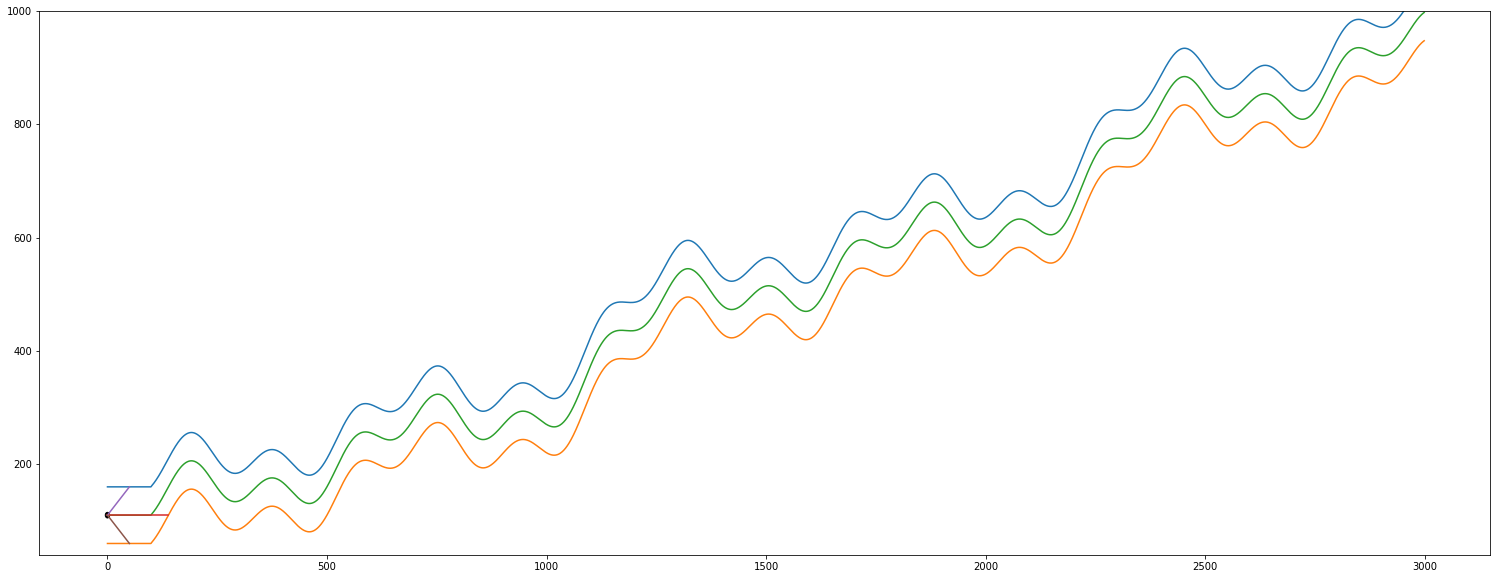

In [ ]:
road = Road(wide = 100)
auto = Car(road)

auto.calculate_distances()
auto.plot()

In [ ]:
auto.calculate_distances()

<a name="run"></a> [log](#log) [car](#car) run [zip](#zip)

# A run ciklus eleje -------------------------------------------------------------------------------------------------------------------- 
# i =  0


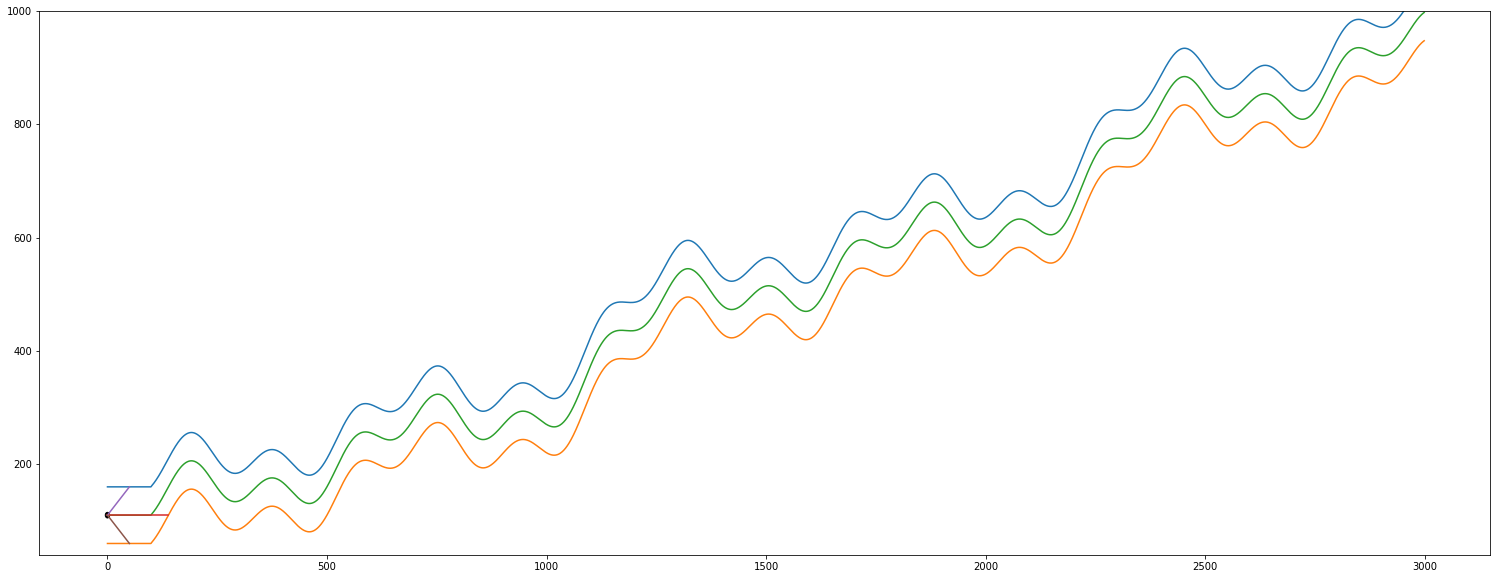

 --------------- plot --------------- 
 --- plot has been saved --- 
 --------------- save plot --------------- 
 --------------- plot trace --------------- 
------------------------------ IF i % 3 == 0 ------------------------------
=================== TAKE ACTION ===================
-------- ennyivel módosítom self.y értékét --------
self.y régi értéke =  110.0
self.y új értéke   =  110.0
action             =  0
----------------- módosítás vége -----------------
# A run ciklus vége ------------------------------------------------------------------------------------------------------------------------------------------
#   itt adom hozzás a self.y a self.y_history-hoz
#    self.y :
110.0
# 			 --------------- Summary ---------------
# 			 _summary_mlp_fit_was_taken         =  0
# 			 _summary_mlp_prediction_was_taken  =  0
# 			 _summary_mesterseges_mozgatas      =  0
# 			 _summary_action_were_taken         =  1
# 
# A run ciklus vége +++++++++++++++++++++++++++++++++++++++++++++++++

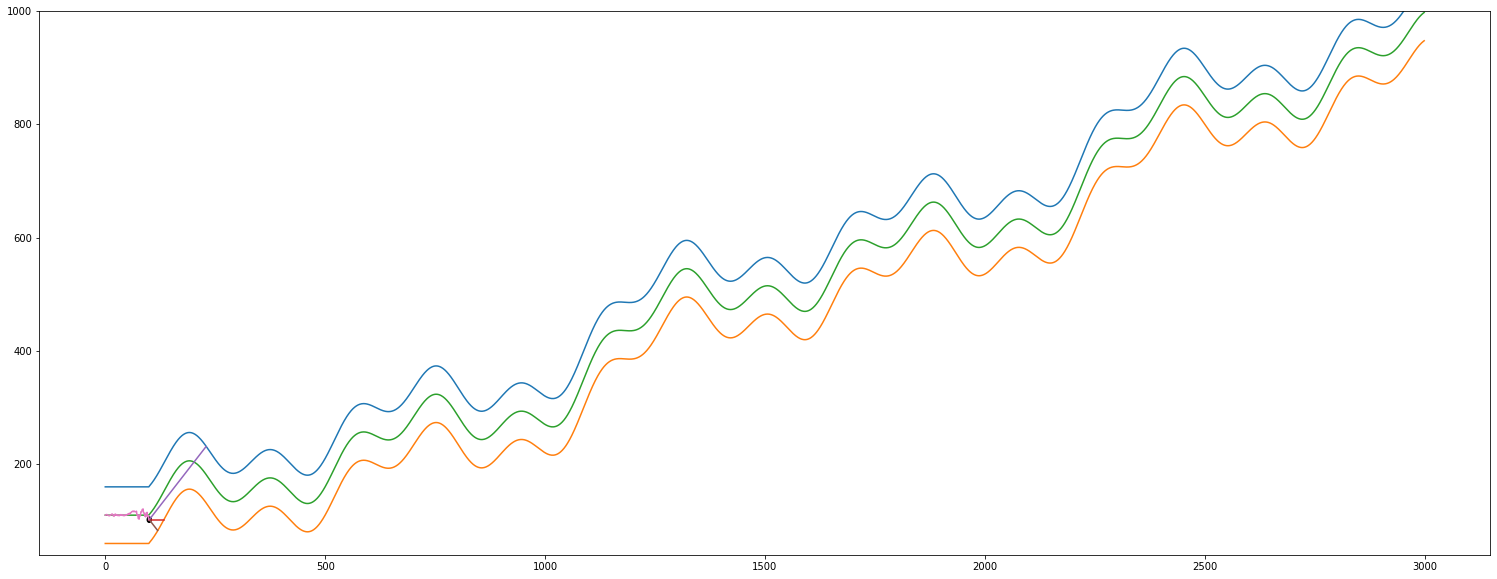

 --------------- plot --------------- 
 --- plot has been saved --- 
 --------------- save plot --------------- 
 --------------- plot trace --------------- 
actual predicted_test =  [-0.21295547]
actual self.y_distance[-1] =  -9.181851483321395
actual predicted_test_inv =  [0.08340073]
len(self.y_distance_predicted) =  27
len(self.y_distance_predicted_inv) =  27
# A run ciklus vége ------------------------------------------------------------------------------------------------------------------------------------------
#   itt adom hozzás a self.y a self.y_history-hoz
#    self.y :
102.0
# 			 --------------- Summary ---------------
# 			 _summary_mlp_fit_was_taken         =  0
# 			 _summary_mlp_prediction_was_taken  =  1
# 			 _summary_mesterseges_mozgatas      =  0
# 			 _summary_action_were_taken         =  0
# 
# A run ciklus vége ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# A run ciklu

In [ ]:
auto.run(166)

<a name="zip"></a> [log](#log) [car](#car) [run](#run) zip

# Dev

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

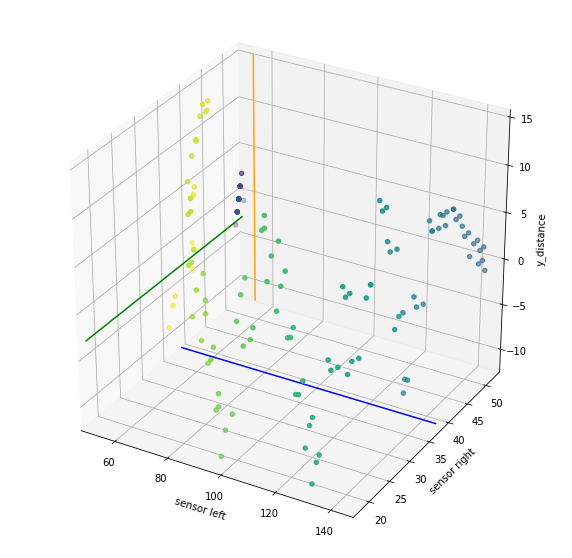

In [ ]:
szin = np.arange(len(auto.sensor_right))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(auto.sensor_left, auto.sensor_right, auto.y_distance, c=szin)
ax.set_xlabel('sensor left')
ax.set_ylabel('sensor right')
ax.set_zlabel('y_distance')
# ax.invert_xaxis()

__x_max = np.max(auto.sensor_left); __x_min = np.min(auto.sensor_left);
__y_max = np.max(auto.sensor_right); __y_min = np.min(auto.sensor_right);
__z_max = np.max(auto.y_distance); __z_min = np.min(auto.y_distance);

ax.set_xlim(__x_min, __x_max);
ax.set_ylim(__y_min, __y_max);
ax.set_zlim(__z_min, __z_max);


__x = auto.sensor_left[-1]; __y = auto.sensor_right[-1]; __z = auto.y_distance[-1];

xe = 0; xv = 10;            xe = __x_min; xv = __x_max;
ye = 10; yv = 10;           ye = __y; yv = __y;
ze = -50; zv = -50;         ze = ax.get_zlim()[0]; zv = ax.get_zlim()[0];

ax.plot([xe,xv],[ye,yv],[ze,zv], c='blue')

xe = 10; xv = 10;           xe = __x_min; xv = __x_min;
ye = 0; yv = 100;           ye = __y_min; yv = __y_max;
ze = 20; ze = 20;           ze = __z; zv = __z;

ax.plot([xe,xv],[ye,yv], [ze,zv], c='green')

xe = 0; xv = 0;             xe = __x; xv = __x;
ye = 0; yv = 100;           ye = __y_max; yv = __y_max;
ze = -50; zv = -50;         ze = __z_min; zv = __z_max;

ax.plot([xe,xv],[ye,yv],[ze,zv], c='orange')
plt.show()

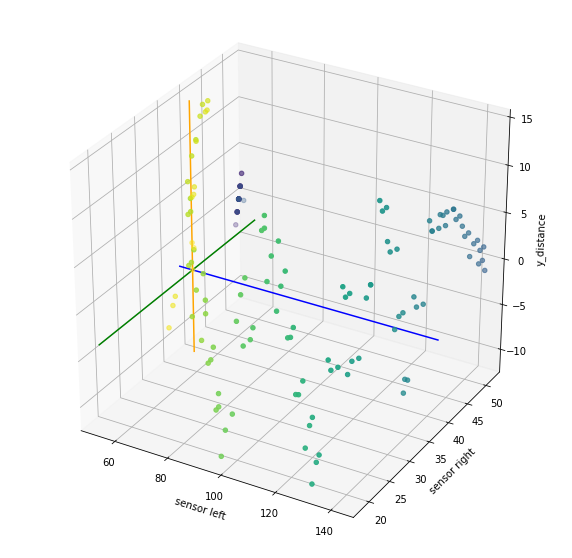

In [ ]:
szin = np.arange(len(auto.sensor_right))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(auto.sensor_left, auto.sensor_right, auto.y_distance, c=szin)
ax.set_xlabel('sensor left')
ax.set_ylabel('sensor right')
ax.set_zlabel('y_distance')
# ax.invert_xaxis()

__x_max = np.max(auto.sensor_left); __x_min = np.min(auto.sensor_left);
__y_max = np.max(auto.sensor_right); __y_min = np.min(auto.sensor_right);
__z_max = np.max(auto.y_distance); __z_min = np.min(auto.y_distance);

ax.set_xlim(__x_min, __x_max);
ax.set_ylim(__y_min, __y_max);
ax.set_zlim(__z_min, __z_max);


__x = auto.sensor_left[-1]; __y = auto.sensor_right[-1]; __z = auto.y_distance[-1];

xe = 0; xv = 10;            xe = __x_min; xv = __x_max;
ye = 10; yv = 10;           ye = __y; yv = __y;
ze = -50; zv = -50;         ze = __z; zv = __z;

ax.plot([xe,xv],[ye,yv],[ze,zv], c='blue')

xe = 10; xv = 10;           xe = __x; xv = __x;
ye = 0; yv = 100;           ye = __y_min; yv = __y_max;
ze = 20; ze = 20;           ze = __z; zv = __z;

ax.plot([xe,xv],[ye,yv], [ze,zv], c='green')

xe = 0; xv = 0;             xe = __x; xv = __x;
ye = 0; yv = 100;           ye = __y; yv = __y;
ze = -50; zv = -50;         ze = __z_min; zv = __z_max;

ax.plot([xe,xv],[ye,yv],[ze,zv], c='orange')
plt.show()

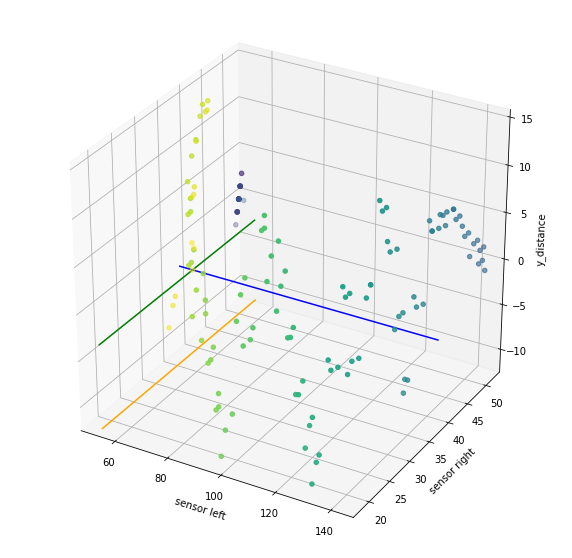

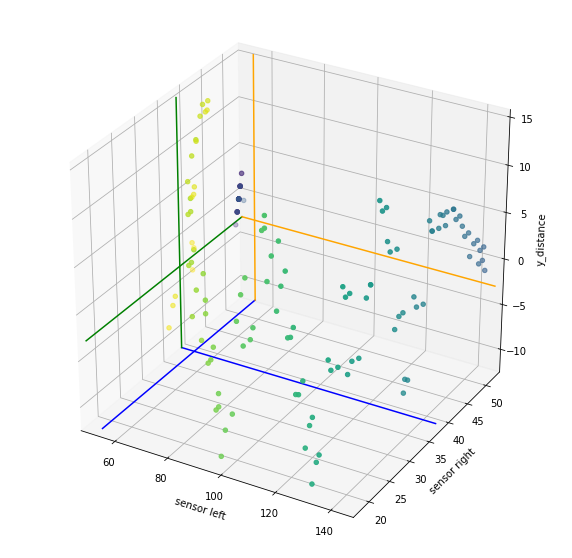

In [ ]:
szin = np.arange(len(auto.sensor_right))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(auto.sensor_left, auto.sensor_right, auto.y_distance, c=szin)
ax.set_xlabel('sensor left')
ax.set_ylabel('sensor right')
ax.set_zlabel('y_distance')
# ax.invert_xaxis()

__x_max = np.max(auto.sensor_left); __x_min = np.min(auto.sensor_left);
__y_max = np.max(auto.sensor_right); __y_min = np.min(auto.sensor_right);
__z_max = np.max(auto.y_distance); __z_min = np.min(auto.y_distance);

ax.set_xlim(__x_min, __x_max);
ax.set_ylim(__y_min, __y_max);
ax.set_zlim(__z_min, __z_max);


__x = auto.sensor_left[-1]; __y = auto.sensor_right[-1]; __z = auto.y_distance[-1];

xe = 0; xv = 0;             xe = __x; xv = __x;
ye = 0; yv = 100;           ye = ax.get_ylim()[0]; yv = ax.get_ylim()[1];
ze = -50; zv = -50;         ze = ax.get_zlim()[0]; zv = ax.get_zlim()[0];

ax.plot([xe,xv],[ye,yv],[ze,zv], c='blue')

xe = 0; xv = 10;            xe = __x_min; xv = __x_max;
ye = 10; yv = 10;           ye = __y; yv = __y;
ze = -50; zv = -50;         ze = ax.get_zlim()[0]; zv = ax.get_zlim()[0];

ax.plot([xe,xv],[ye,yv],[ze,zv], c='blue')

xe = 10; xv = 10;           xe = ax.get_xlim()[0]; xv = ax.get_xlim()[0];
ye = 0; yv = 100;           ye = __y; yv = __y;
ze = 20; ze = 20;           ze = __z_min; zv = __z_max;

ax.plot([xe,xv],[ye,yv], [ze,zv], c='green')

xe = 10; xv = 10;           xe = __x_min; xv = __x_min;
ye = 0; yv = 100;           ye = __y_min; yv = __y_max;
ze = 20; ze = 20;           ze = __z; zv = __z;

ax.plot([xe,xv],[ye,yv], [ze,zv], c='green')

xe = 0; xv = 0;             xe = __x_min; xv = __x_max;
ye = 0; yv = 100;           ye = __y_max; yv = __y_max;
ze = -50; zv = -50;         ze = __z; zv = __z;

ax.plot([xe,xv],[ye,yv],[ze,zv], c='orange')

xe = 0; xv = 0;             xe = __x; xv = __x;
ye = 0; yv = 100;           ye = __y_max; yv = __y_max;
ze = -50; zv = -50;         ze = __z_min; zv = __z_max;

ax.plot([xe,xv],[ye,yv],[ze,zv], c='orange')
plt.show()

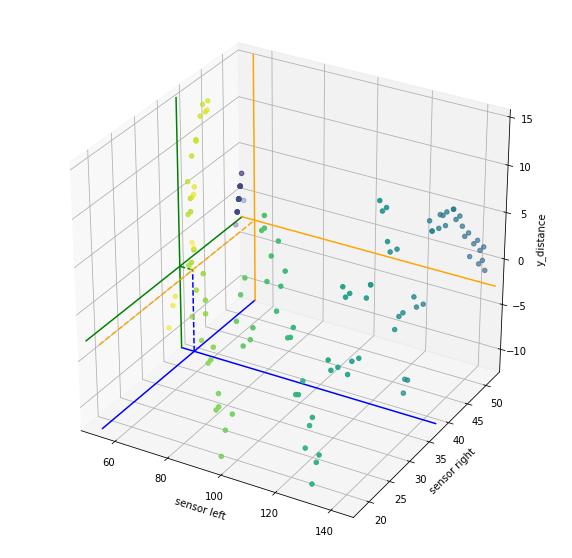

In [ ]:
szin = np.arange(len(auto.sensor_right))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(auto.sensor_left, auto.sensor_right, auto.y_distance, c=szin)
ax.set_xlabel('sensor left')
ax.set_ylabel('sensor right')
ax.set_zlabel('y_distance')
# ax.invert_xaxis()

__x_max = np.max(auto.sensor_left); __x_min = np.min(auto.sensor_left);
__y_max = np.max(auto.sensor_right); __y_min = np.min(auto.sensor_right);
__z_max = np.max(auto.y_distance); __z_min = np.min(auto.y_distance);

ax.set_xlim(__x_min, __x_max);
ax.set_ylim(__y_min, __y_max);
ax.set_zlim(__z_min, __z_max);


__x = auto.sensor_left[-1]; __y = auto.sensor_right[-1]; __z = auto.y_distance[-1];

xe = 0; xv = 0;             xe = __x; xv = __x;
ye = 0; yv = 100;           ye = ax.get_ylim()[0]; yv = ax.get_ylim()[1];
ze = -50; zv = -50;         ze = ax.get_zlim()[0]; zv = ax.get_zlim()[0];

ax.plot([xe,xv],[ye,yv],[ze,zv], c='blue')

xe = 0; xv = 10;            xe = __x_min; xv = __x_max;
ye = 10; yv = 10;           ye = __y; yv = __y;
ze = -50; zv = -50;         ze = ax.get_zlim()[0]; zv = ax.get_zlim()[0];

ax.plot([xe,xv],[ye,yv],[ze,zv], c='blue')

xe = 10; xv = 10;           xe = ax.get_xlim()[0]; xv = ax.get_xlim()[0];
ye = 0; yv = 100;           ye = __y; yv = __y;
ze = 20; ze = 20;           ze = __z_min; zv = __z_max;

ax.plot([xe,xv],[ye,yv], [ze,zv], c='green')

xe = 10; xv = 10;           xe = __x_min; xv = __x_min;
ye = 0; yv = 100;           ye = __y_min; yv = __y_max;
ze = 20; ze = 20;           ze = __z; zv = __z;

ax.plot([xe,xv],[ye,yv], [ze,zv], c='green')

xe = 0; xv = 0;             xe = __x_min; xv = __x_max;
ye = 0; yv = 100;           ye = __y_max; yv = __y_max;
ze = -50; zv = -50;         ze = __z; zv = __z;

ax.plot([xe,xv],[ye,yv],[ze,zv], c='orange')

xe = 0; xv = 0;             xe = __x; xv = __x;
ye = 0; yv = 100;           ye = __y_max; yv = __y_max;
ze = -50; zv = -50;         ze = __z_min; zv = __z_max;

ax.plot([xe,xv],[ye,yv],[ze,zv], c='orange')

# ---
xe = 0; xv = 0;             xe = __x; xv = __x;
ye = 0; yv = 100;           ye = ax.get_ylim()[0]; yv = ax.get_ylim()[1];
ze = -50; zv = -50;         ze = __z; zv = __z;

ax.plot([xe,xv],[ye,yv],[ze,zv], c='orange', linestyle='dashed') #dotted

xe = 0; xv = 0;             xe = __x_min; xv = __x;
ye = 0; yv = 100;           ye = __y; yv = __y;
ze = -50; zv = -50;         ze = __z; zv = __z;

ax.plot([xe,xv],[ye,yv],[ze,zv], c='green', linestyle='dashed') #dotted

xe = 0; xv = 0;             xe = __x; xv = __x;
ye = 0; yv = 100;           ye = __y; yv = __y;
ze = -50; zv = -50;         ze = __z_min; zv = __z;

ax.plot([xe,xv],[ye,yv],[ze,zv], c='blue', linestyle='dashed') #dotted
plt.show()

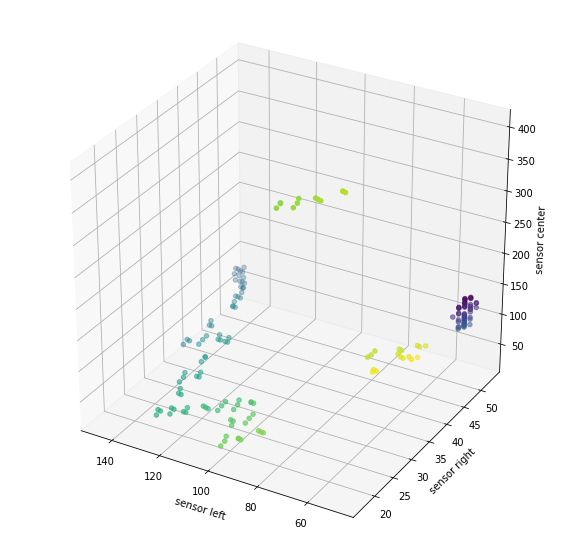

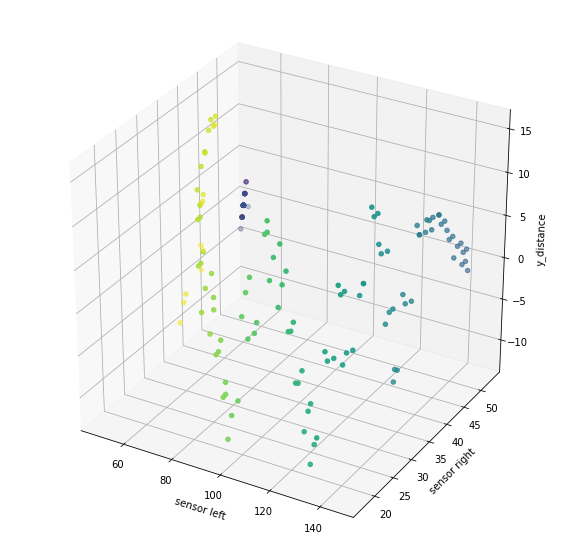

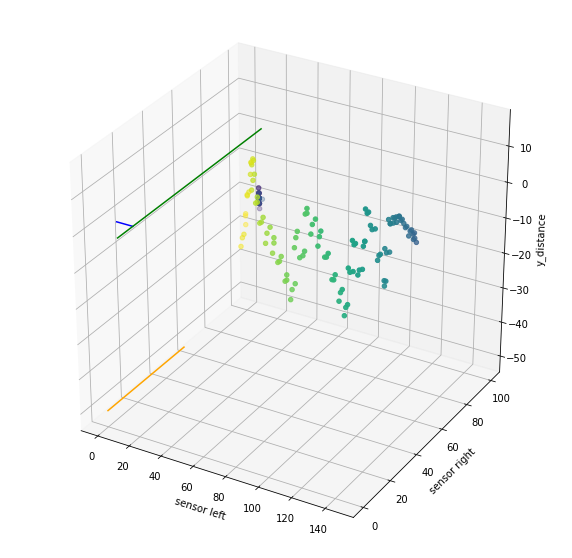

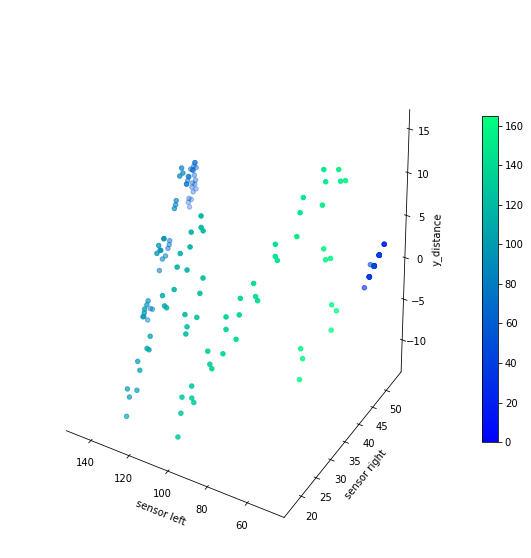

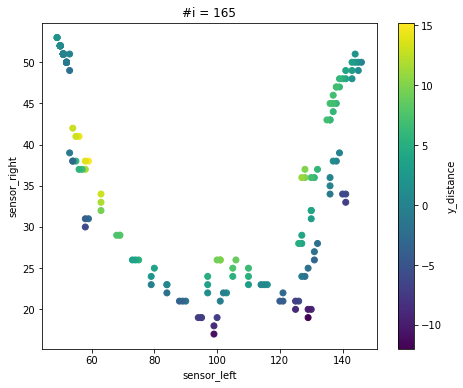

In [ ]:
auto.plot_state_space_discover(1)

# Data

In [ ]:
# Egyéként ha majd azt akarom csinálni, hogy menet közben nem akarok kiprintelni semmit
# de a végén szeretnék néhány képet csinálni a meglévő függvényekkel.
# Akkor nem kell újra írnom őket, hanem a Car ojektumon átálitom a <<flag>>
# értékeket és meghívom az adott plot() függvényt valahogy így

# auto.plot_investigation_flag = 1          # 0 - disable, 1 - plot, 2 - save, 3 - both

# auto.plot_investigation_senors(_y_test_full, predicted_test_full, self.plot_investigation_flag)

# bár azért ezzel óvatósan, ki tudja mit tárolt el éppen az utolsó változó

# Zip *.png to images.zip

In [ ]:
%%capture
! zip -0 images.zip *.png

In [ ]:
from google.colab import files

files.download('images.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

@Depricated
# Save to anigif

Nagyon lassú és nagy méretű fájlokat állít elő.<br>
Felváltottam az MP4 Exporttal.

In [ ]:
import glob
from PIL import Image
from google.colab import files

def create_animated_gif(filter = 'hist*.png', output = 'ani_history.gif', framerate = 5):
  frames = []
  imgs = glob.glob(filter)
  imgs.sort()
  s = len(imgs)-1
  t = s/framerate
  print('len(imgs) = ', len(imgs))
  for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

  # Save into a GIF files that loops forever
  frames[0].save(output, format = 'GIF', append_images = frames[1:], save_all = True, duration = int(t), loop = 0)

In [ ]:
# output = 'ani_history.gif'

# create_animated_gif('hist*.png', output, framerate = 2); files.download(output)

In [ ]:
# output = 'ani_y_move.gif'

# create_animated_gif('y_move*.png', output, framerate = 2); files.download(output)

In [ ]:
# output = 'ani_trace.gif'

# create_animated_gif('trace*.png', output, framerate = 2); files.download(output)

[log](#log) [car](#car) [run](#run) [zip](#zip)

In [ ]:
import os
import glob
from google.colab import files

def create_animated_mp4(filter = 'history*.png', prefix = 'ani_', framerate = 10):
  output = prefix + filter[0:filter.find('*')] + '.mp4'
  print('output = ', output)
  os.system('rm ' + output)
  if( len(glob.glob(filter)) > 0 ):
    # os.system('ffmpeg -r ' + str(framerate) + ' -pattern_type glob -i "' + filter + '" -vcodec mpeg4 -y ' + output)
    os.system('ffmpeg -r ' + str(framerate) + ' -pattern_type glob -i "' + filter + '" -vcodec libx264 -crf 25 -pix_fmt yuv420p ' + output)

    # rossz egyenként letöltögetni őket, ugyhogy inkább be zippelem és egyben letöltöm
    # files.download(output)
  else:
    print('Nincsenek ilyen filok a szürési feltétel alapján -> ezért videót sem csináltunk')

In [ ]:
create_animated_mp4('history*.png', 'ani_', framerate=10)

create_animated_mp4('y_move*.png', framerate=10)

create_animated_mp4('trace*.png', framerate=10)

output =  ani_history.mp4
output =  ani_y_move.mp4
Nincsenek ilyen filok a szürési feltétel alapján -> ezért videót sem csináltunk
output =  ani_trace.mp4
Nincsenek ilyen filok a szürési feltétel alapján -> ezért videót sem csináltunk


In [ ]:
create_animated_mp4('sensorCenterAfterScaled_vs_sensorCenterPredictedAfterScaled_S1*.png', framerate=10)

create_animated_mp4('sensorCenterBeforeScaled_vs_sensorCenterAfterScaled_v1*.png', framerate=10)

create_animated_mp4('sensorCenterBeforeScaled_vs_sensorCenterAfterScaled_v2*.png', framerate=10)

create_animated_mp4('sensorCenterBeforeScaled_vs_sensorCenterAfterScaled_v3*.png', framerate=10)

create_animated_mp4('sensorCenter_vs_yDistance_v1*.png', framerate=2)

create_animated_mp4('sensorLeftAfterScaled_vs_sensorLeftPredictedAfterScaled_S1*.png', framerate=10)

create_animated_mp4('sensorLeftBeforeScaled_vs_sensorLeftAfterScaled_v1*.png', framerate=10)

create_animated_mp4('sensorLeftBeforeScaled_vs_sensorLeftAfterScaled_v3*.png', framerate=10)

create_animated_mp4('sensorRightAfterScaled_vs_sensorRightPredictedAfterScaled_S1*.png', framerate=10)

create_animated_mp4('sensorRightBeforeScaled_vs_sensorRightAfterScaled_v1*.png', framerate=10)

create_animated_mp4('sensorRightBeforeScaled_vs_sensorRightAfterScaled_v2*.png', framerate=10)

create_animated_mp4('sensorRightBeforeScaled_vs_sensorRightAfterScaled_v3*.png', framerate=10)

create_animated_mp4('sensorRight_vs_yDistance_v1*.png', framerate=2)

create_animated_mp4('state_space_discover_LeftRightCenter_3D*.png', framerate=10)

create_animated_mp4('state_space_discover_LeftRightYDistance_3D*.png', framerate=10)

create_animated_mp4('state_space_discover_LeftRightYDistance_2D*.png', framerate=10)

create_animated_mp4('state_space_discover_LeftRightYDistance_WhitoutBorder*.png', framerate=10)

create_animated_mp4('yDistance_vs_yDistance_predicted_type0*.png', framerate=2)

create_animated_mp4('yDistance_vs_yDistance_predicted_type1*.png', framerate=2)

create_animated_mp4('yDistance_vs_yDistance_predicted_type2*.png', framerate=2)

create_animated_mp4('yDistance_vs_yDistance_predicted_type3*.png', framerate=2)

create_animated_mp4('yDistance_vs_yDistance_predicted_type4*.png', framerate=2)

create_animated_mp4('yDistance_vs_yDistance_predicted_type5*.png', framerate=2)

create_animated_mp4('yDistance_vs_yDistance_predicted_typeWrong*.png', framerate=2)

create_animated_mp4('yDistance_vs_yDistance_predicted_typeCorrect*.png', framerate=2)

output =  ani_sensorCenterAfterScaled_vs_sensorCenterPredictedAfterScaled_S1.mp4
Nincsenek ilyen filok a szürési feltétel alapján -> ezért videót sem csináltunk
output =  ani_sensorCenterBeforeScaled_vs_sensorCenterAfterScaled_v1.mp4
Nincsenek ilyen filok a szürési feltétel alapján -> ezért videót sem csináltunk
output =  ani_sensorCenterBeforeScaled_vs_sensorCenterAfterScaled_v2.mp4
Nincsenek ilyen filok a szürési feltétel alapján -> ezért videót sem csináltunk
output =  ani_sensorCenterBeforeScaled_vs_sensorCenterAfterScaled_v3.mp4
Nincsenek ilyen filok a szürési feltétel alapján -> ezért videót sem csináltunk
output =  ani_sensorCenter_vs_yDistance_v1.mp4
Nincsenek ilyen filok a szürési feltétel alapján -> ezért videót sem csináltunk
output =  ani_sensorLeftAfterScaled_vs_sensorLeftPredictedAfterScaled_S1.mp4
Nincsenek ilyen filok a szürési feltétel alapján -> ezért videót sem csináltunk
output =  ani_sensorLeftBeforeScaled_vs_sensorLeftAfterScaled_v1.mp4
Nincsenek ilyen filok a szü

In [ ]:
%%capture
! zip -0 ani.zip *.mp4

In [ ]:
files.download('ani.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# !rm *.png *.mp4

In [ ]:
# !unzip images.zip

[log](#log) [car](#car) [run](#run) [zip](#zip)

<a name="irodalom"></a>

# Felhasznált irodalom és internetes cimek

Itt gyűjtöttem össze a menet közben összegyűjt okosságokat

[vissza a tartalomhoz](#tartalom)<br>

Scikit-learn - MLPRegressor API
<br>
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html


Fogalmak és probléma meghatározás
<br>
https://www.rubrik.com/blog/architecture/20/12/customized-autoscaling--minimize-your-cloud-cost


https://github.com/kubernetes/autoscaler/blob/master/cluster-autoscaler/FAQ.md#what-are-the-parameters-to-ca

https://arxiv.org/pdf/1608.04030.pdf

Metrikák amivel a szollgáltatás minőségét mérik különböző esetekben
<br>
https://blog.avinetworks.com/autoscaling-metrics

------------

NumPy API Reference Guide
<br>
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html


Seaborn API Reference Guide
<br>
https://seaborn.pydata.org/examples/pair_grid_with_kde.html


Python Logger API Reference Guide
<br>
https://docs.python.org/3/howto/logging-cookbook.html#logging-cookbook


Python Logger API Tutorial
<br>
https://coralogix.com/blog/python-logging-best-practices-tips


PyPlot Colorbar Tutorial
<br>
https://matplotlib.org/stable/tutorials/colors/colorbar_only.html


PyPlot Subplot Tutorial
<br>
https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html

------------

Scikit learn API Warm_start and Partial_fit
<br>
https://newbedev.com/what-is-the-difference-between-partial-fit-and-warm-start


Online learning
<br>
https://www.dummies.com/programming/big-data/data-science/tips-for-dealing-with-big-data-in-python/


Online learning
<br>
https://dziganto.github.io/data%20science/online%20learning/python/scikit-learn/An-Introduction-To-Online-Machine-Learning/


------------

Huber Loss
<br>
https://en.wikipedia.org/wiki/Huber_loss


Gradient Descent - van benne egy tök jó animáció - emlékszem amikor az első ilyet írtam 10 éve
<br>
https://en.wikipedia.org/wiki/Gradient_descent


Online Learning
<br>
https://en.wikipedia.org/wiki/Online_machine_learning


Ezen tök jól lehet demonstrálni, hogy miért tanul gyorsan a 'relu', gyorsabban a 'tanh' és lassan a 'logistic' azonos beállítások mellett, habár végül midhárom közel azonos eredményre vezet
<br>
https://playground.tensorflow.org
